## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from simple_colors import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotnine import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest

## Load and read data

In [2]:
# loading the dataset to pandas dataframe
df = pd.read_csv("hrdata.csv")
df.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [3]:
df.tail()

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0

In [4]:
#Dataset Size
df.shape

(54808, 14)

In [5]:
print("Dataset has {} data  with {} variables each.".format(*df.shape))

Dataset has 54808 data  with 14 variables each.


# Explotory Data Analysis (EDA) & Visualization

In [6]:
df.reindex()

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0  

[54808 rows x 14 columns]

In [7]:
# statistical measure of dataset
df.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [8]:
#Get information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


**Commits**
*We only have NULL values in "Education" & "previous_year_rating" columns

In [9]:
#check missing values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
df.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [11]:
df.education = df.education.fillna("Bachelor's")
df

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9        Bachelor's      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0  

[54808 rows x 14 columns]

In [12]:
df.education.value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [13]:
df.previous_year_rating.value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [14]:
df.previous_year_rating = df.previous_year_rating.fillna(3.0)
df

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9        Bachelor's      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0  

[54808 rows x 14 columns]

In [15]:
df.previous_year_rating.value_counts()

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [16]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [17]:
df= df.rename(columns={'employee_id':'Emp_ID', 'department':'Department','region':'No_of_Region','education':'Level_of_education','gender':'Gender','recruitment_channel':'Recruitment_channel','no_of_trainings' :'No_of_other_trainings_completed','age':'Age','previous_year_rating':'Performance_Score', 'length_of_service':'Length_of_service','KPIs_met >80%':'High_KPIS','awards_won?':'Awards_won','avg_training_score':'Average_score_evaluations' })

In [18]:
df.drop_duplicates(inplace=True)
df

Emp_ID         Department No_of_Region Level_of_education Gender  \
0       65438  Sales & Marketing     region_7   Master's & above      f   
1       65141         Operations    region_22         Bachelor's      m   
2        7513  Sales & Marketing    region_19         Bachelor's      m   
3        2542  Sales & Marketing    region_23         Bachelor's      m   
4       48945         Technology    region_26         Bachelor's      m   
...       ...                ...          ...                ...    ...   
54803    3030         Technology    region_14         Bachelor's      m   
54804   74592         Operations    region_27   Master's & above      f   
54805   13918          Analytics     region_1         Bachelor's      m   
54806   13614  Sales & Marketing     region_9         Bachelor's      m   
54807   51526                 HR    region_22         Bachelor's      m   

      Recruitment_channel  No_of_other_trainings_completed  Age  \
0                sourcing                                1   35   
1                   other                                1   30   
2                sourcing                                1   34   
3                   other                                2   39   
4                   other                                1   45   
...                   ...                              ...  ...   
54803            sourcing                                1   48   
54804               other                                1   37   
54805               other                                1   27   
54806            sourcing                                1   29   
54807               other                                1   27   

       Performance_Score  Length_of_service  High_KPIS  Awards_won  \
0                    5.0                  8          1           0   
1                    5.0                  4          0           0   
2                    3.0                  7          0           0   
3                    1.0                 10          0           0   
4                    3.0                  2          0           0   
...                  ...                ...        ...         ...   
54803                3.0                 17          0           0   
54804                2.0                  6          0           0   
54805                5.0                  3          1           0   
54806                1.0                  2          0           0   
54807                1.0                  5          0           0   

       Average_score_evaluations  is_promoted  
0                             49            0  
1                             60            0  
2                             50            0  
3                             50            0  
4                             73            0  
...                          ...          ...  
54803                         78            0  
54804                         56            0  
54805                         79            0  
54806                         45            0  
54807                         49            0  

[54808 rows x 14 columns]

**Commits**
*The data types are appropriate.*
*The dataset covers data on 54808 employees.*


In [19]:
for column in df.select_dtypes(include='O').columns:
    print(blue(f'{column}', 'bold')) 
    print(black('Number of unique values :', 'underlined'), df[column].nunique())
    if column == 'employee_id':
        print(df[column].unique()[:30])
    else:
        print(df[column].unique())
    print()

Department
Number of unique values : 9
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

No_of_Region
Number of unique values : 34
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']

Level_of_education
Number of unique values : 3
["Master's & above" "Bachelor's" 'Below Secondary']

Gender
Number of unique values : 2
['f' 'm']

Recruitment_channel
Number of unique values : 3
['sourcing' 'other' 'referred']



In [20]:
#How many employees have been promoted and not?
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [21]:
print('1. The percentage of employees who have not received a promotion are ' + str(round((50140/54808)*100,2)) + '%')
print('2. The percentage of employees who get promoted are ' + str(round((4668/54808)*100,2)) + '%')

1. The percentage of employees who have not received a promotion are 91.48%
2. The percentage of employees who get promoted are 8.52%


**Commits**
-Dataframe have 14 columns and 54808 rows
-Total categorical columns are 5 columns
-Total numerical columns are 9 columns
-There are 2 columns that have a missing value (education and previous_year_rating)
-is_promoted column is the target for this dataset


## DATA VISUALIZATION

### Now, some charts for the most relevant information of the data

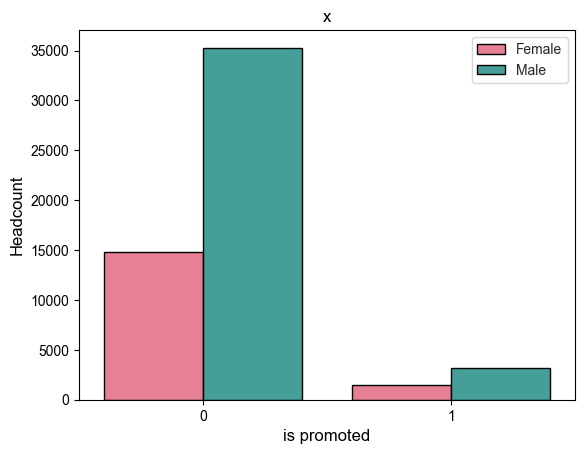

In [22]:
fig= sns.countplot(data=df, x='is_promoted', hue="Gender", palette = 'husl',  edgecolor = "black")
fig.set_xlabel("is promoted", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("x")
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

plt.legend({"Male", "Female"})

**Now let's go to go in depth to know parameters of influence in the promotion of employees**

### About Employee's gender

In [23]:
df['Gender']

0        f
1        m
2        m
3        m
4        m
        ..
54803    m
54804    f
54805    m
54806    m
54807    m
Name: Gender, Length: 54808, dtype: object

In [24]:
df['Gender'].unique()

array(['f', 'm'], dtype=object)

opcion: Gender con is_promoted 


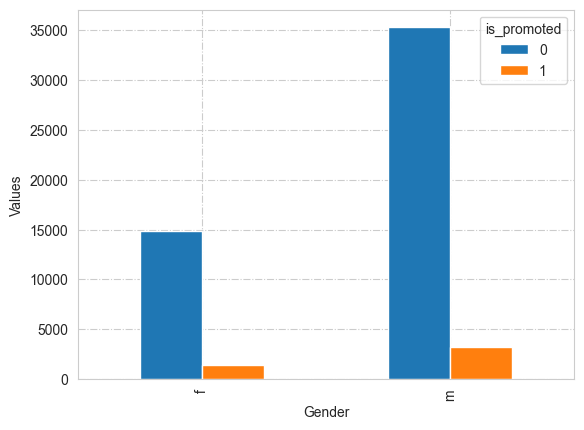

In [25]:
opciones = ["Gender"]

for opcion in opciones:
    print('opcion:', opcion, 'con is_promoted ')
    pd.crosstab(df[opcion], df.is_promoted).plot(kind="bar")
    plt.xlabel('Gender')
    plt.ylabel('Values')
    plt.show()

**More men than women are trained annually, and men are more promoted**

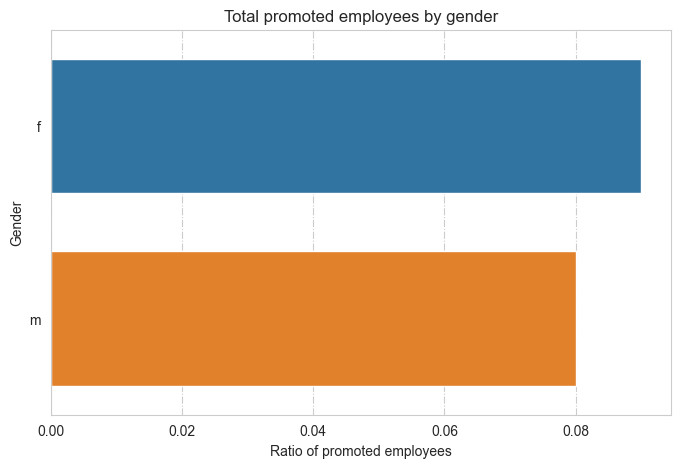

In [26]:

Genderpro = pd.merge(right=df.groupby(['Gender'])[['Emp_ID']].count().reset_index(), left=df.groupby(['Gender'])[['is_promoted']].sum().reset_index(), on='Gender', how="outer")

Genderpro['AbsRatio'] = round(Genderpro['is_promoted']/Genderpro['Emp_ID'], 2)
Genderpro.sort_values(by=['AbsRatio'], ascending=False, inplace=True)
plt.figure(figsize=(8, 5))
sns.barplot(Genderpro, x='AbsRatio', y='Gender', width=0.7, orient='h')
plt.title("Total promoted employees by gender")
plt.xlabel('Ratio of promoted employees');



**The number of trained female employees that passes is greater than that of men, this means that from a group of women and men, promotion in women is more effective.**

In [27]:
df.groupby("Gender").is_promoted.value_counts()

Gender  is_promoted
f       0              14845
        1               1467
m       0              35295
        1               3201
Name: count, dtype: int64

**Now, I create a dataframe to analyze the workers who have been promoted**

In [100]:
df_ispromoted = df[df.is_promoted==1]

In [101]:
df_ispromoted.value_counts()

Emp_ID  Department         No_of_Region  Level_of_education  Gender  Recruitment_channel  No_of_other_trainings_completed  Age  Performance_Score  Length_of_service  High_KPIS  Awards_won  Average_score_evaluations  is_promoted
39      Procurement        region_15     Master's & above    m       other                1                                37   4.0                8                  1          0           90                         1              1
53162   Technology         region_15     Bachelor's          m       sourcing             1                                38   5.0                7                  1          0           79                         1              1
52772   Technology         region_17     Bachelor's          m       sourcing             1                                30   3.0                6                  0          0           81                         1              1
52698   Analytics          region_6      Bachelor's          m       sour

In [30]:
df_ispromoted.shape

(4668, 14)

In [37]:
df.Department.value_counts()

Department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [39]:
df.groupby("Department").is_promoted.value_counts()

Department         is_promoted
Analytics          0               4840
                   1                512
Finance            0               2330
                   1                206
HR                 0               2282
                   1                136
Legal              0                986
                   1                 53
Operations         0              10325
                   1               1023
Procurement        0               6450
                   1                688
R&D                0                930
                   1                 69
Sales & Marketing  0              15627
                   1               1213
Technology         0               6370
                   1                768
Name: count, dtype: int64

C:\Users\ostab\AppData\Local\Temp\ipykernel_12644\2824425078.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


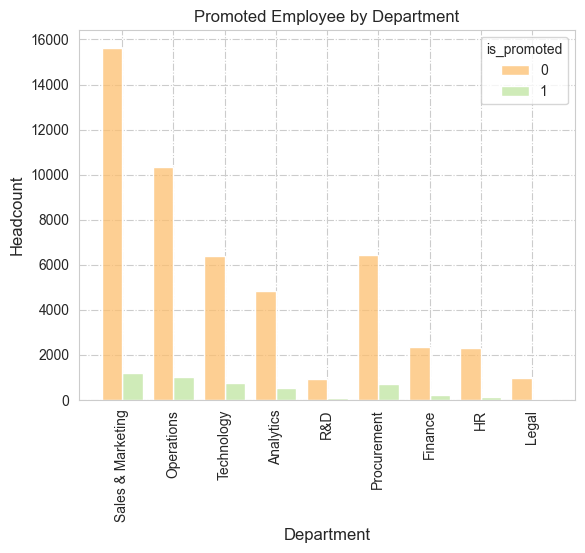

In [31]:
fig= sns.histplot(df, x="Department", hue="is_promoted", multiple="dodge", shrink=.8, palette = "Spectral")
fig.set_xlabel("Department", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Department", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

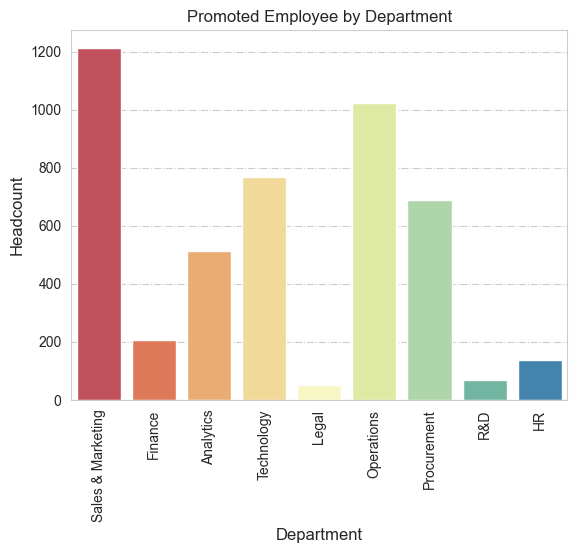

In [166]:
fig= sns.countplot(df_ispromoted, x="Department", palette = "Spectral")
fig.set_xlabel("Department", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Department", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})


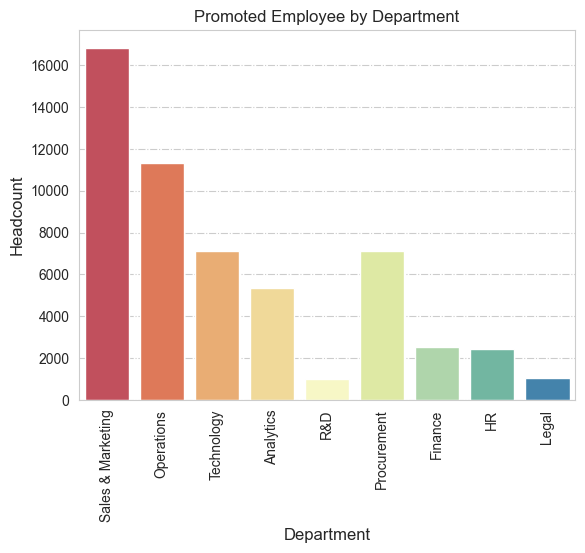

In [167]:
fig= sns.countplot(df, x="Department", palette = "Spectral")
fig.set_xlabel("Department", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Department", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

[Text(0, 0, '53'),
 Text(0, 0, '69'),
 Text(0, 0, '136'),
 Text(0, 0, '206'),
 Text(0, 0, '512'),
 Text(0, 0, '688'),
 Text(0, 0, '768'),
 Text(0, 0, '1023'),
 Text(0, 0, '1213')]

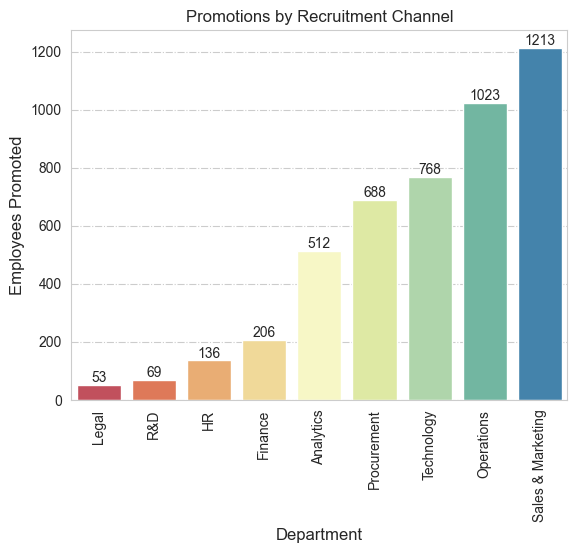

In [74]:
fig = df_ispromoted['Department'].value_counts()
fig= df_ispromoted['Department'].value_counts(ascending=True).rename_axis('Department').rename('Headcount') 
ax =sns.barplot(x=fig.index, y=fig.values, order=fig.index, palette = "Spectral")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
ax.set_xlabel("Department", fontsize=12)
ax.set_ylabel("Employees Promoted", fontsize=12)
ax.set_title("Promotions by Recruitment Channel", fontsize=12)
ax.bar_label(ax.containers[0])



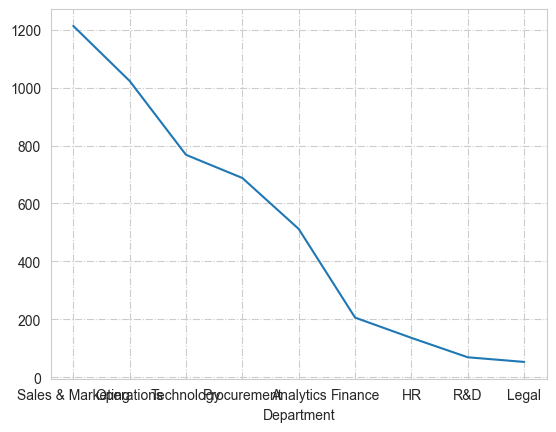

In [41]:
fig2 = df_ispromoted['Department'].value_counts()
fig2= df_ispromoted['Department'].value_counts().rename_axis('Department').rename('Headcount') 
ax1 =sns.lineplot(x=fig2.index, y=fig2.values)



In [43]:
ax1 =sns.lineplot(x=fig2.index, y=fig2.values,  ax=ax1)


<Axes: xlabel='Department'>

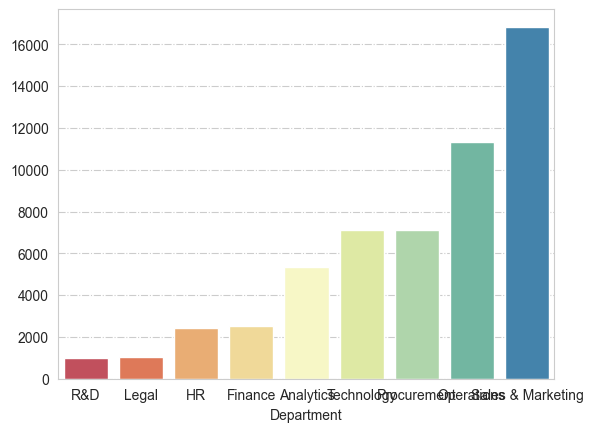

In [44]:
fig = df['Department'].value_counts()
fig= df['Department'].value_counts(ascending=True).rename_axis('Department').rename('Headcount') 
sns.barplot(x=fig.index, y=fig.values, order=fig.index, palette = "Spectral")

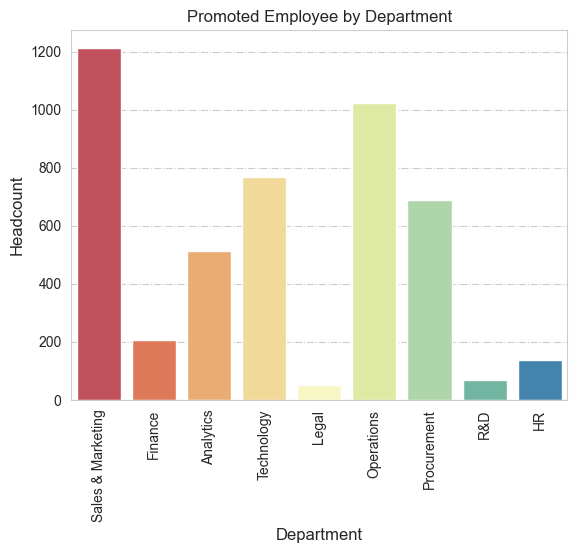

In [45]:
fig= sns.countplot(df_ispromoted, x="Department", palette = "Spectral")
fig.set_xlabel("Department", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Department", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [47]:
df.groupby("Level_of_education").is_promoted.value_counts()

Level_of_education  is_promoted
Bachelor's          0              35948
                    1               3130
Below Secondary     0                738
                    1                 67
Master's & above    0              13454
                    1               1471
Name: count, dtype: int64

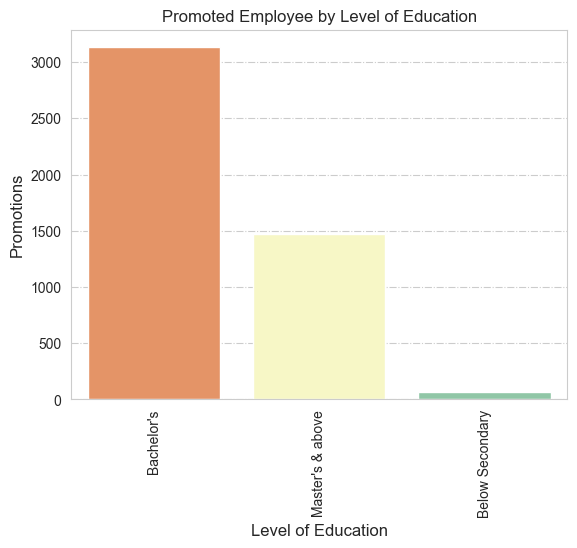

In [170]:
fig= sns.countplot(df_ispromoted, x="Level_of_education", palette = "Spectral")
fig.set_xlabel("Level of Education", fontsize=12)
fig.set_ylabel("Promotions", fontsize=12)
fig.set_title("Promoted Employee by Level of Education", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

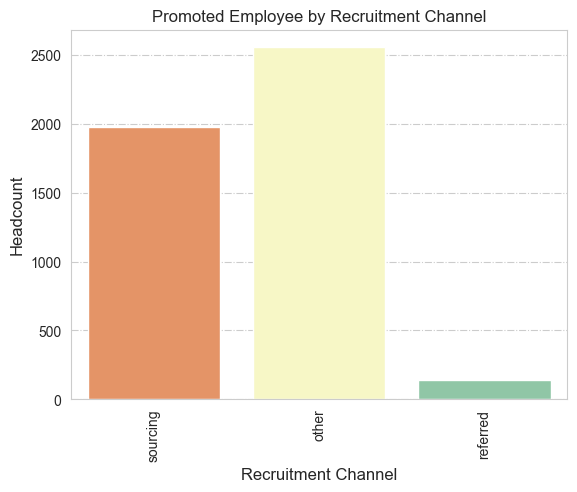

In [47]:
fig= sns.countplot(df_ispromoted, x="Recruitment_channel", palette = "Spectral")
fig.set_xlabel("Recruitment Channel", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Recruitment Channel", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [49]:
df.groupby("No_of_other_trainings_completed").is_promoted.value_counts()

No_of_other_trainings_completed  is_promoted
1                                0              40468
                                 1               3910
2                                0               7382
                                 1                605
3                                0               1654
                                 1                122
4                                0                442
                                 1                 26
5                                0                125
                                 1                  3
6                                0                 42
                                 1                  2
7                                0                 12
8                                0                  5
9                                0                  5
10                               0                  5
Name: count, dtype: int64

[Text(0, 0, '3910'),
 Text(0, 0, '605'),
 Text(0, 0, '122'),
 Text(0, 0, '26'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

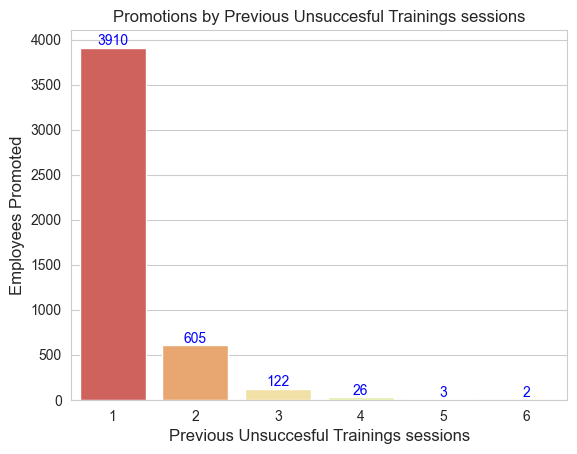

In [149]:
fig= sns.countplot(df_ispromoted, x="No_of_other_trainings_completed", palette = "Spectral")
fig.set_xlabel("Previous Unsuccesful Trainings sessions", fontsize=12)
fig.set_ylabel("Employees Promoted", fontsize=12)
fig.set_title("Promotions by Previous Unsuccesful Trainings sessions", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-'})
fig.bar_label(fig.containers[0], color='blue')

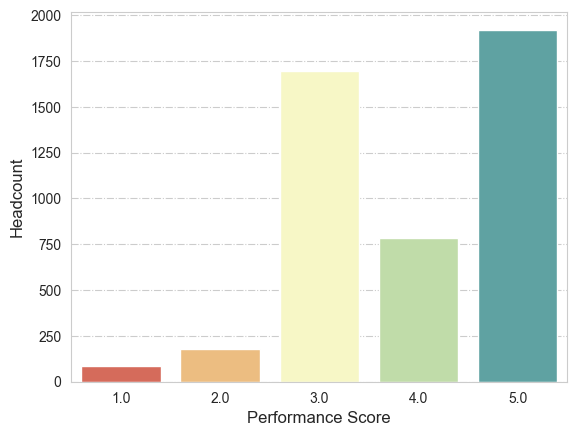

In [162]:
fig= sns.countplot(df_ispromoted, x="Performance_Score", palette = "Spectral")
fig.set_xlabel("Performance Score", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

[Text(0, 0, '88'),
 Text(0, 0, '181'),
 Text(0, 0, '784'),
 Text(0, 0, '1694'),
 Text(0, 0, '1921')]

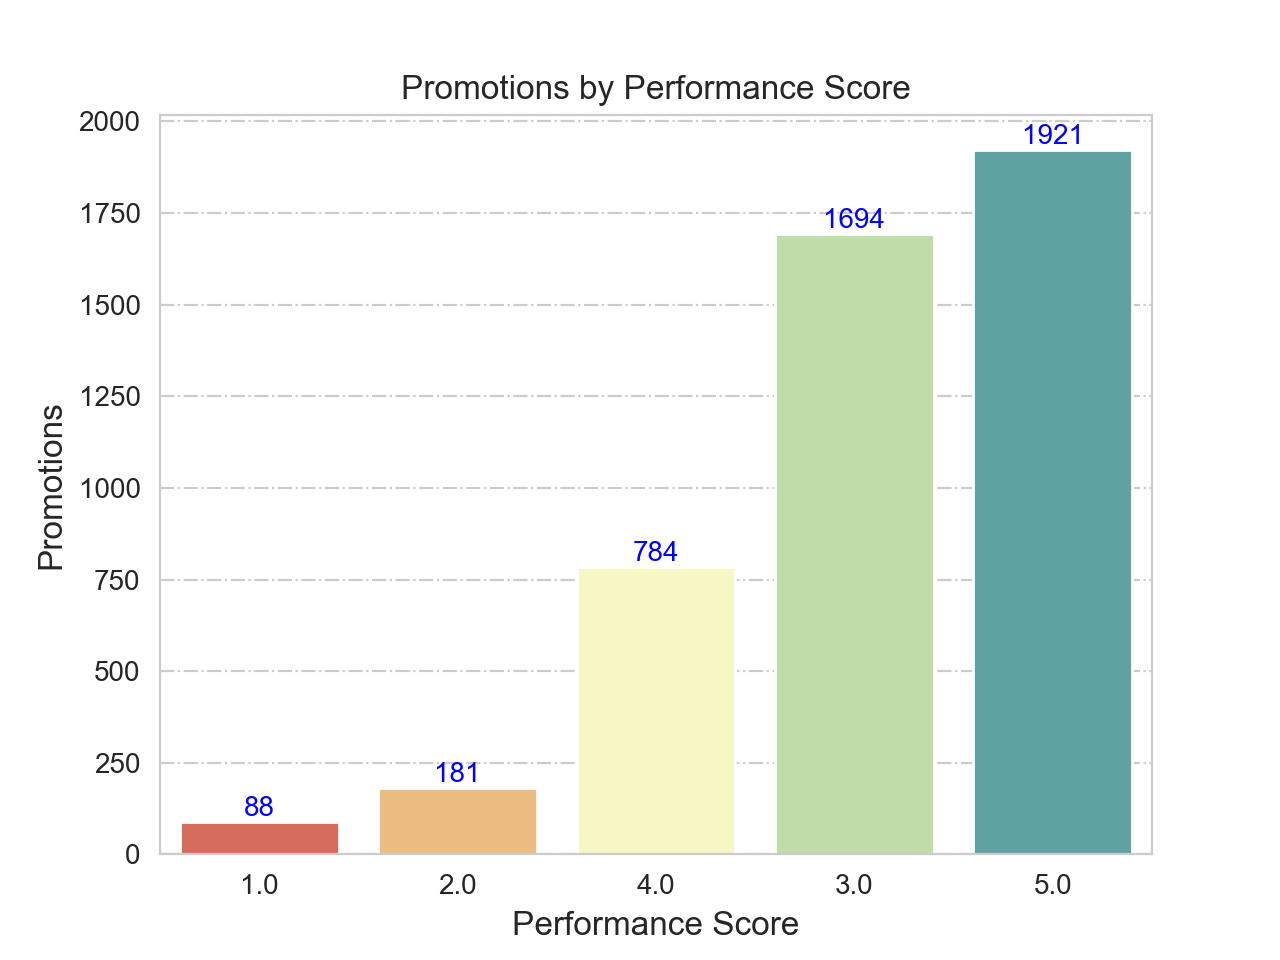

In [217]:
fig = df_ispromoted["Performance_Score"].value_counts()
fig= df_ispromoted["Performance_Score"].value_counts(ascending=True) 
fig=sns.barplot(x=fig.index, y=fig.values, order=fig.index, palette = "Spectral")
fig.set_xlabel("Performance Score", fontsize=12)
fig.set_ylabel("Promotions", fontsize=12)
fig.set_title("Promotions by Performance Score", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
fig.bar_label(fig.containers[0], color='blue')

In [61]:
df_ispromoted.groupby("is_promoted").Length_of_service.value_counts(ascending=False)

is_promoted  Length_of_service
1            3                    609
             4                    598
             2                    595
             5                    475
             7                    464
             6                    401
             1                    377
             8                    269
             9                    229
             10                   204
             11                    96
             12                    63
             13                    54
             15                    43
             16                    41
             19                    32
             14                    29
             17                    26
             18                    25
             20                    10
             23                     7
             22                     6
             21                     4
             29                     3
             25                     2
             28    

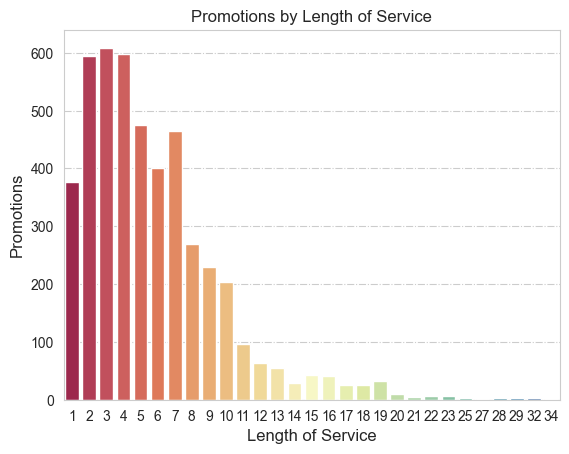

In [178]:
fig= sns.countplot(df_ispromoted, x="Length_of_service", palette = "Spectral")
fig.set_xlabel("Length of Service", fontsize=12)
fig.set_ylabel("Promotions", fontsize=12)
fig.set_title("Promotions by Length of Service", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [62]:
df_ispromoted.groupby("is_promoted").High_KPIS.value_counts(ascending=False)

is_promoted  High_KPIS
1            1            3262
             0            1406
Name: count, dtype: int64

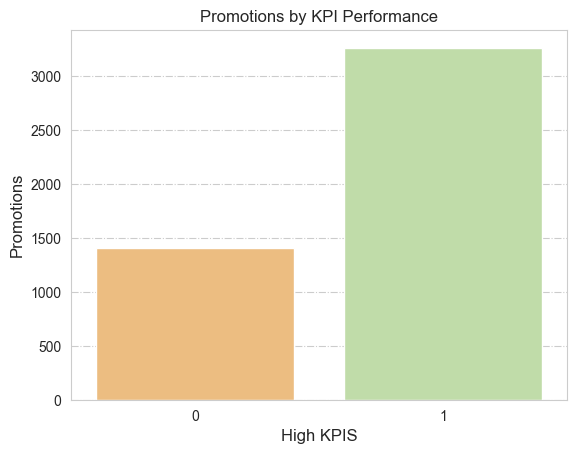

In [183]:
fig= sns.countplot(df_ispromoted, x="High_KPIS", palette = "Spectral")
fig.set_xlabel("High KPIS", fontsize=12)
fig.set_ylabel("Promotions", fontsize=12)
fig.set_title("Promotions by KPI Performance", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

is_promoted  Awards_won
1            0             4109
             1              559
Name: count, dtype: int64

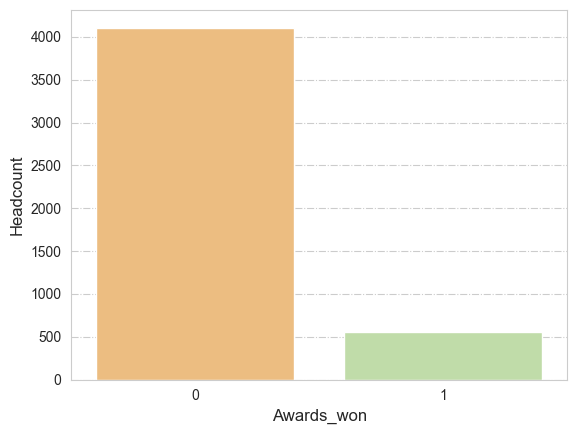

In [57]:
fig= sns.countplot(df_ispromoted, x="Awards_won", palette = "Spectral")
fig.set_xlabel("Awards_won", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

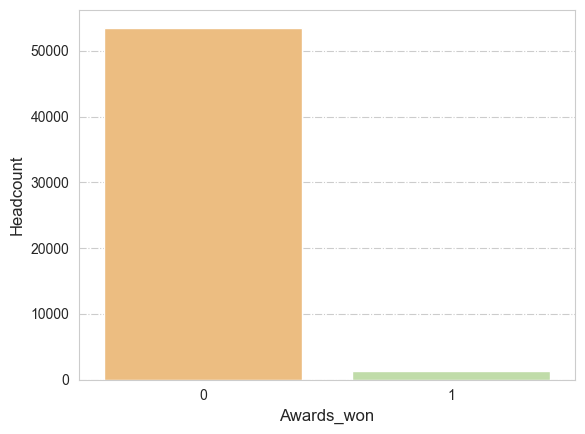

In [70]:
fig= sns.countplot(df, x="Awards_won", palette = "Spectral")
fig.set_xlabel("Awards_won", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

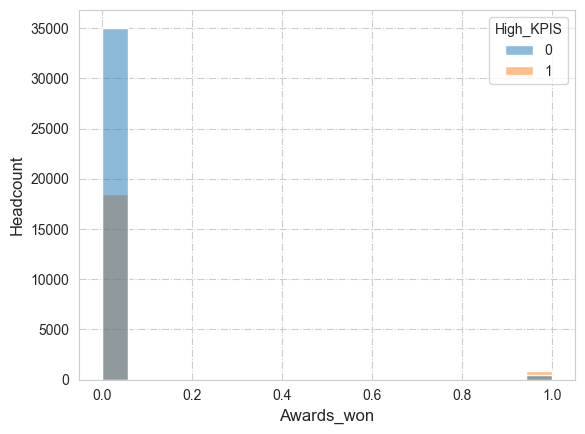

In [69]:
fig= sns.histplot(df_ispromoted, x="Awards_won", hue¡ palette = "Spectral")
fig.set_xlabel("Awards_won", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [71]:
df_ispromoted.groupby("is_promoted").Average_score_evaluations.value_counts(ascending=False)

is_promoted  Average_score_evaluations
1            82                           151
             81                           149
             61                           146
             59                           145
             60                           138
             58                           130
             83                           127
             70                           123
             86                           120
             84                           120
             80                           120
             62                           117
             50                           112
             71                           108
             85                           105
             51                           103
             49                           100
             48                            96
             69                            96
             63                            94
             78                          

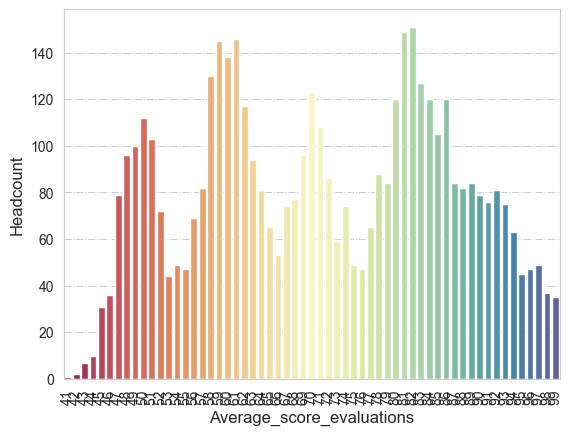

In [94]:
fig= sns.countplot(df_ispromoted, x="Average_score_evaluations", palette = "Spectral")
fig.set_xlabel("Average_score_evaluations", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

C:\Users\ostab\AppData\Local\Temp\ipykernel_18840\2242037466.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


<Axes: xlabel='Average_score_evaluations', ylabel='Density'>

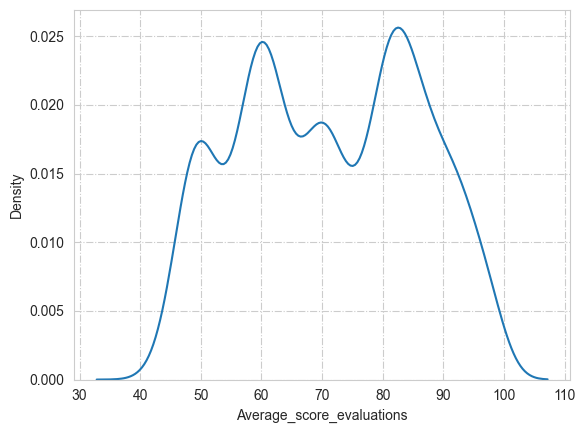

In [96]:
sns.kdeplot(data=df_ispromoted, x='Average_score_evaluations', palette = "Spectral")

C:\Users\ostab\AppData\Local\Temp\ipykernel_12644\334726156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



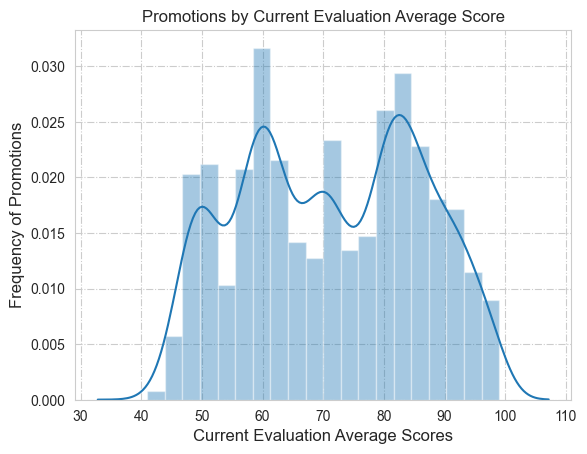

In [192]:
fig=sns.distplot(df_ispromoted['Average_score_evaluations'])
fig.set_xlabel("Current Evaluation Average Scores", fontsize=12)
fig.set_ylabel("Frequency of Promotions", fontsize=12)
fig.set_title("Promotions by Current Evaluation Average Score", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

<Axes: xlabel='Length_of_service', ylabel='Density'>

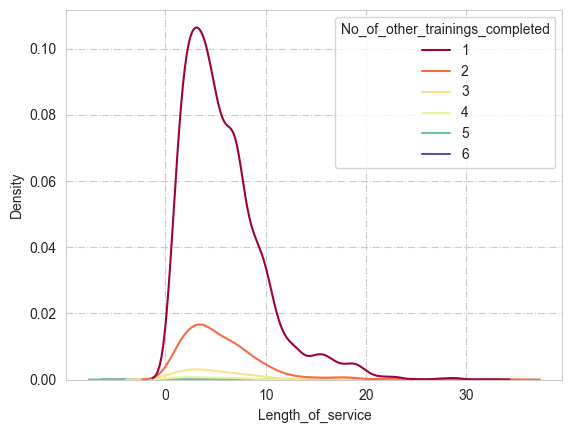

In [175]:
sns.kdeplot(data=df_ispromoted, x='Length_of_service', hue="No_of_other_trainings_completed", palette = "Spectral")

<Axes: xlabel='Length_of_service', ylabel='Density'>

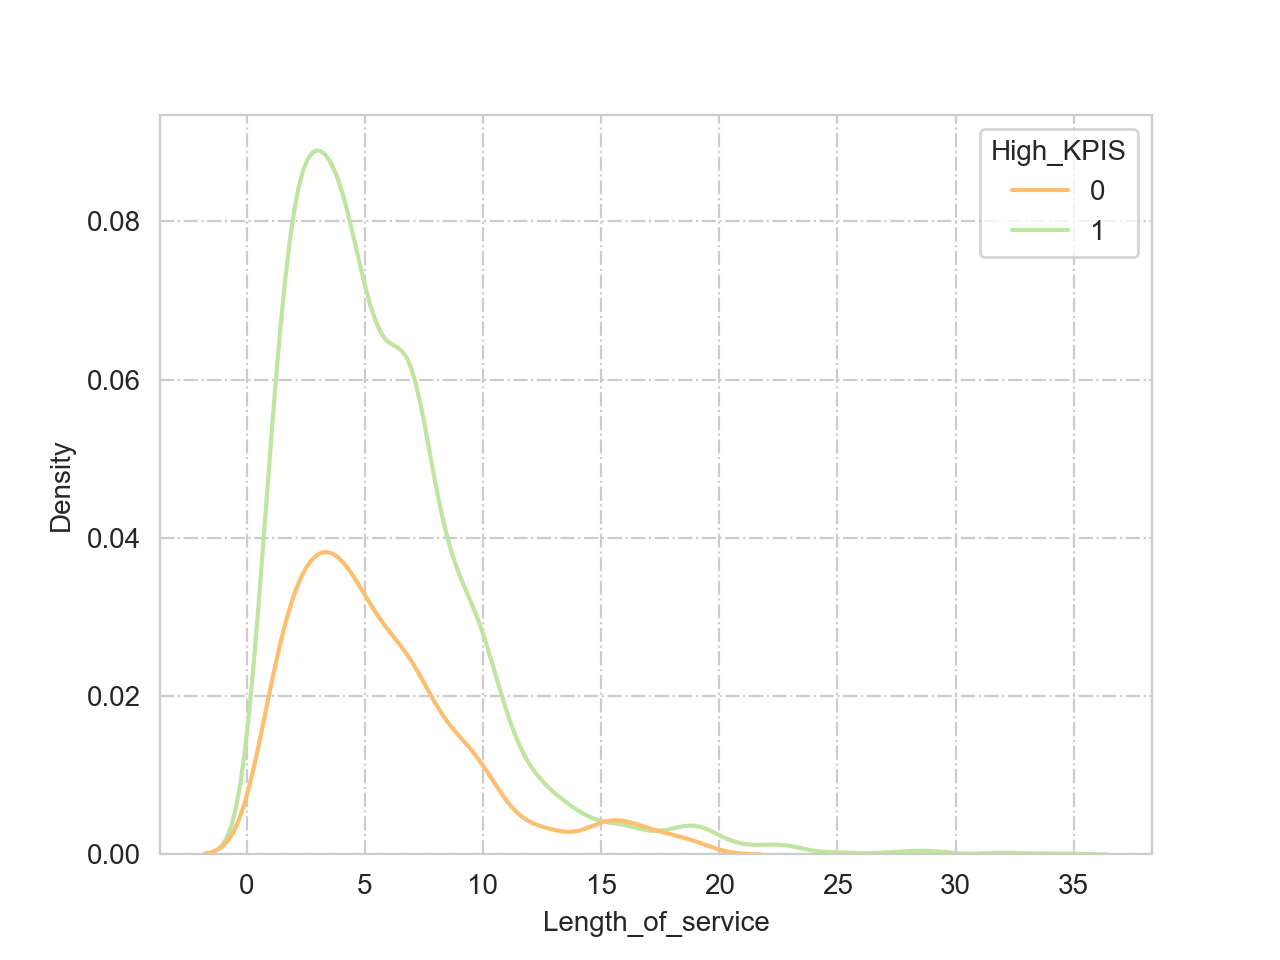

In [218]:
sns.kdeplot(data=df_ispromoted, x='Length_of_service', hue="High_KPIS", palette = "Spectral")

C:\Users\ostab\AppData\Local\Temp\ipykernel_12644\3016113790.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


<Axes: xlabel='Length_of_service', ylabel='Density'>

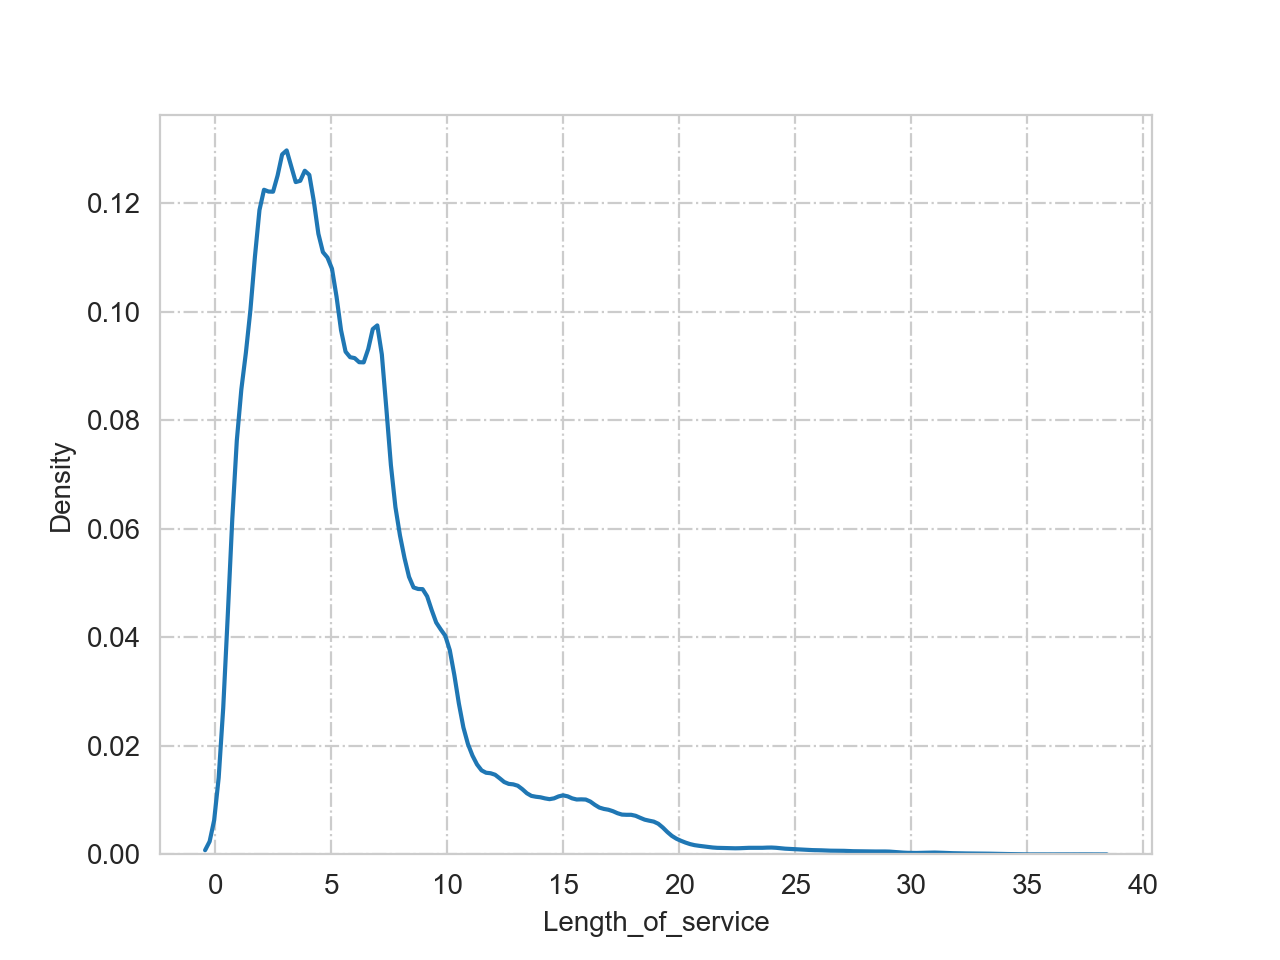

In [220]:
sns.kdeplot(data=df, x='Length_of_service', palette = "Spectral")

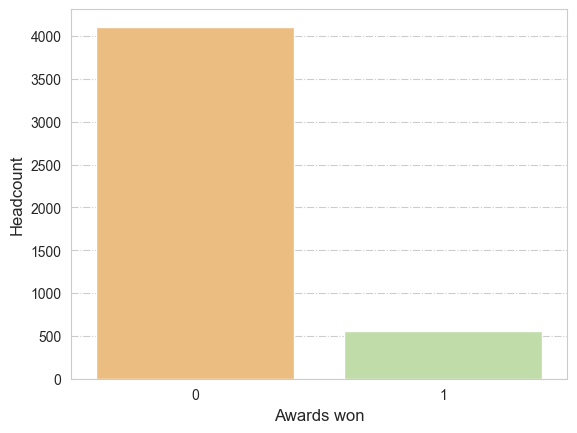

In [55]:
fig= sns.countplot(df_ispromoted, x="Awards_won", palette = "Spectral")
fig.set_xlabel("Awards won", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [69]:
awardsandkpi= df_ispromoted[(df_ispromoted['Awards_won']==0) & (df_ispromoted['High_KPIS']==0)]
awardsandkpi.head()

Emp_ID         Department No_of_Region Level_of_education Gender  \
67    16502  Sales & Marketing    region_22         Bachelor's      m   
79    59147  Sales & Marketing    region_22         Bachelor's      m   
84    44575              Legal     region_7         Bachelor's      m   
116   51892         Technology     region_2         Bachelor's      m   
133   19318          Analytics    region_22         Bachelor's      m   

    Recruitment_channel  No_of_other_trainings_completed  Age  \
67             sourcing                                1   27   
79             sourcing                                1   30   
84                other                                1   29   
116               other                                1   27   
133               other                                1   32   

     Performance_Score  Length_of_service  High_KPIS  Awards_won  \
67                 3.0                  1          0           0   
79                 3.0                  3          0           0   
84                 3.0                  1          0           0   
116                5.0                  2          0           0   
133                3.0                  8          0           0   

     Average_score_evaluations  is_promoted  
67                          61            1  
79                          58            1  
84                          65            1  
116                         86            1  
133                         89            1

In [140]:
dfrc=pd.crosstab(index=df_ispromoted['is_promoted'], columns=df['Recruitment_channel'], normalize="index")
dfrc

Recruitment_channel     other  referred  sourcing
is_promoted                                      
1                    0.547558  0.029563  0.422879

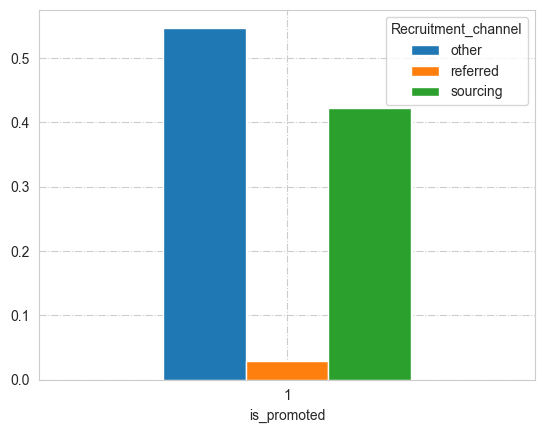

In [141]:

barplot = dfrc.plot.bar(rot=0)

In [106]:
dfrc=df_ispromoted.Recruitment_channel.value_counts(ascending=False)
dfrc


Recruitment_channel
other       2556
sourcing    1974
referred     138
Name: count, dtype: int64

C:\Users\ostab\AppData\Local\Temp\ipykernel_18840\2172653810.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


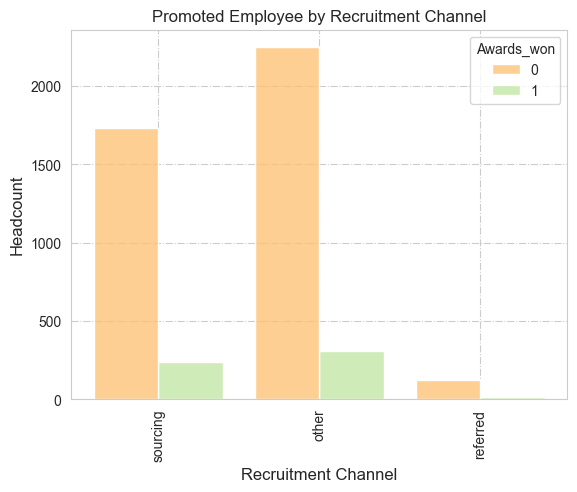

In [75]:
fig= sns.histplot(df_ispromoted, x="Recruitment_channel",hue="Awards_won",  multiple="dodge", shrink=.8, palette = "Spectral") 
fig.set_xlabel("Recruitment Channel", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Recruitment Channel", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

[Text(0, 0, '1974'), Text(0, 0, '2556'), Text(0, 0, '138')]

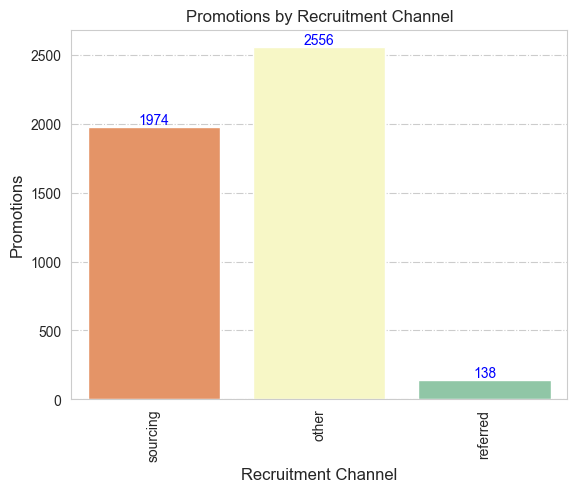

In [83]:
fig= sns.countplot(df_ispromoted, x="Recruitment_channel",palette = "Spectral") 
fig.set_xlabel("Recruitment Channel", fontsize=12)
fig.set_ylabel("Promotions", fontsize=12)
fig.set_title("Promotions by Recruitment Channel", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
fig.bar_label(fig.containers[0], color='blue')


C:\Users\ostab\AppData\Local\Temp\ipykernel_18840\1351723469.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


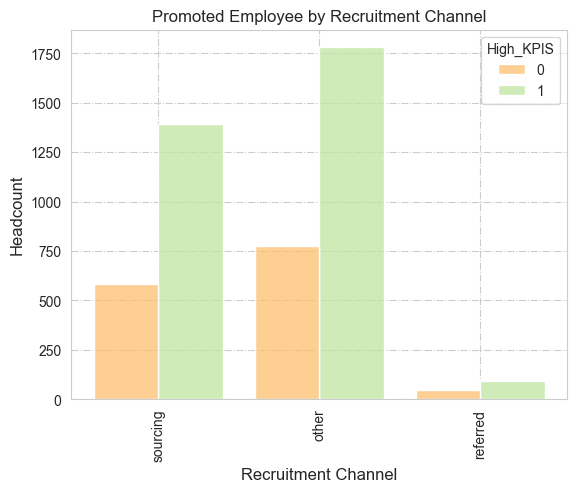

In [76]:
fig= sns.histplot(df_ispromoted, x="Recruitment_channel",hue="High_KPIS",  multiple="dodge", shrink=.8, palette = "Spectral") 
fig.set_xlabel("Recruitment Channel", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Recruitment Channel", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

C:\Users\ostab\AppData\Local\Temp\ipykernel_18840\2340829215.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


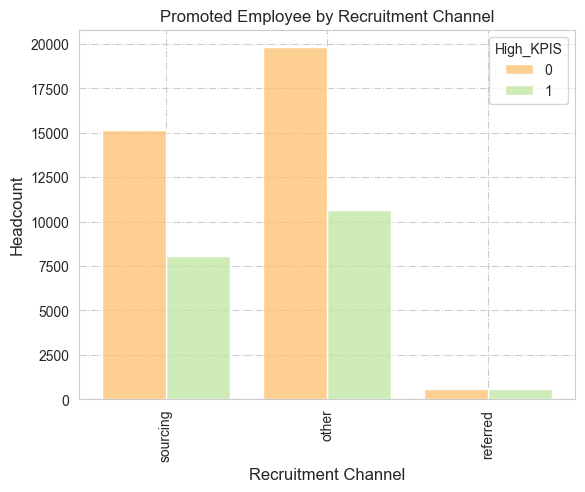

In [77]:
fig= sns.histplot(df, x="Recruitment_channel",hue="High_KPIS",  multiple="dodge", shrink=.8, palette = "Spectral") 
fig.set_xlabel("Recruitment Channel", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
fig.set_title("Promoted Employee by Recruitment Channel", fontsize=12)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

Promoteed  and: Gender


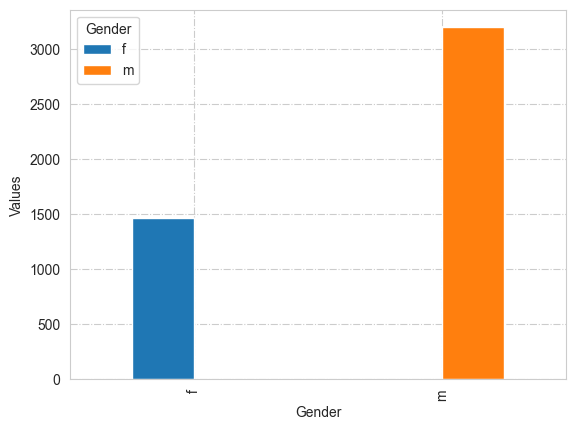

In [193]:
opciones1 = ["Gender"]

for opcion in opciones:
    print('Promoteed  ''and:', opcion, )
    pd.crosstab(df_ispromoted[opcion], df.Gender).plot(kind="bar")
    plt.xlabel('Gender')
    plt.ylabel('Values')
    plt.show()

opcion: Recruitment_channel vs is Gender


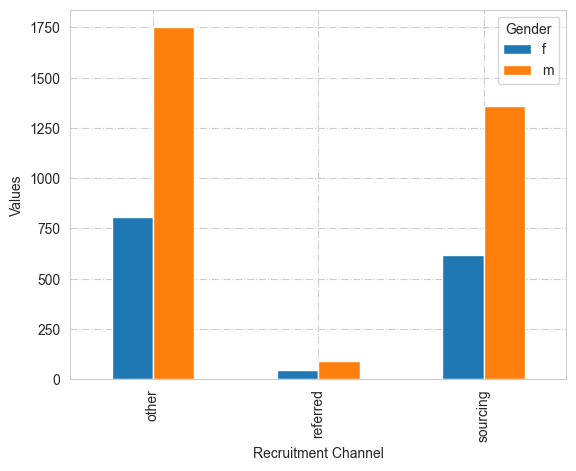

In [194]:
opciones2 = ["Recruitment_channel"]

for opcion in opciones2:
    print('opcion:', opcion, 'vs is Gender')
    pd.crosstab(df_ispromoted[opcion], df.Gender).plot(kind="bar")
    plt.xlabel('Recruitment Channel')
    plt.ylabel('Values')
    plt.show()

In [195]:
df.groupby("Recruitment_channel").is_promoted.value_counts()

Recruitment_channel  is_promoted
other                0              27890
                     1               2556
referred             0               1004
                     1                138
sourcing             0              21246
                     1               1974
Name: count, dtype: int64

In [196]:
print('1. The percentage of employees who have received a promotion and have been employed by referred channel is ' + str(round((138/4668)*100,2)) + '%')
print('2. The percentage of employees who have received a promotion and have been employed by sourcing channel is  ' + str(round((1974/4668)*100,2)) + '%')
print('2. The percentage of employees who have received a promotion and have been employed by other channel is  ' + str(round((2556/4668)*100,2)) + '%')

1. The percentage of employees who have received a promotion and have been employed by referred channel is 2.96%
2. The percentage of employees who have received a promotion and have been employed by sourcing channel is  42.29%
2. The percentage of employees who have received a promotion and have been employed by other channel is  54.76%


**Regarding the recruitment channel, the recruitment channel that contributes the least promotions is the one in which company employees refer their acquaintances, with 3% of the total promotions, on the other hand, using external companies has contributed close to 42% of promoted employees, while other types of recruitment such as internet pages have contributed 55% of the promotions, in conclusion hiring through referrals and external companies should be reduced and the search for candidates through internet pages that present more skills should be increased**

opcion: Department vs gender


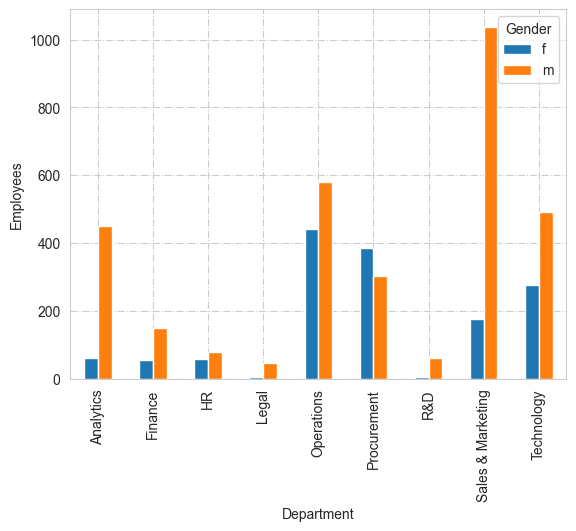

opcion: Level_of_education vs gender


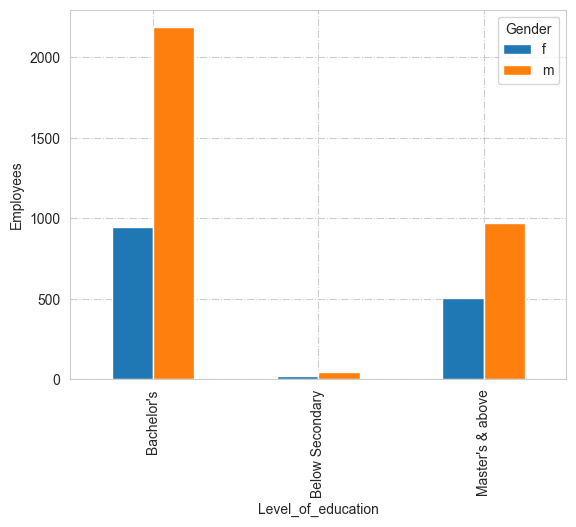

opcion: Recruitment_channel vs gender


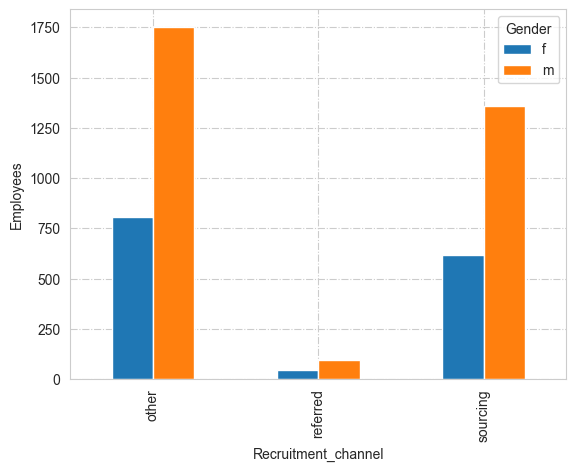

opcion: No_of_other_trainings_completed vs gender


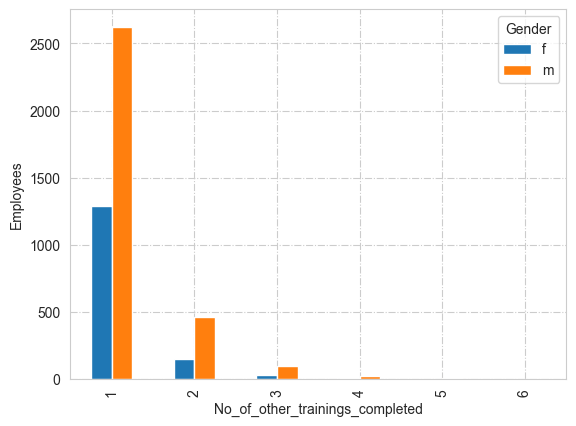

opcion: Age vs gender


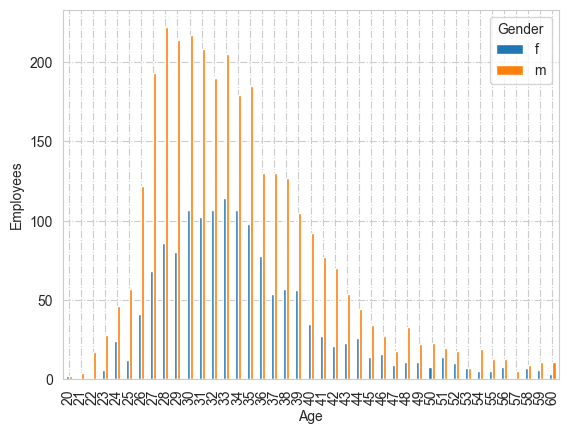

opcion: Performance_Score vs gender


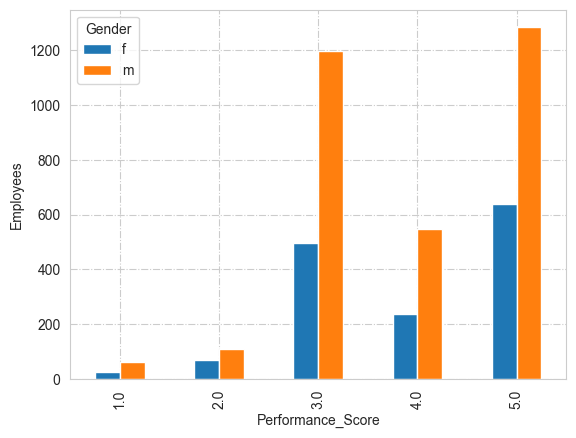

opcion: Length_of_service vs gender


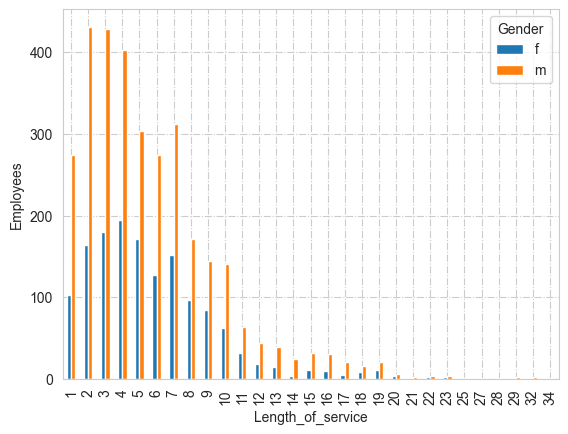

opcion: High_KPIS vs gender


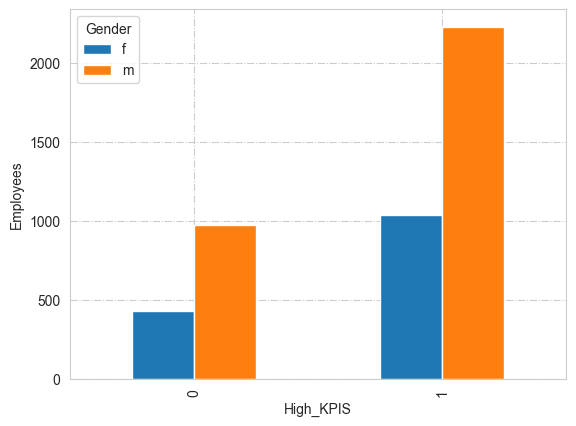

opcion: Awards_won vs gender


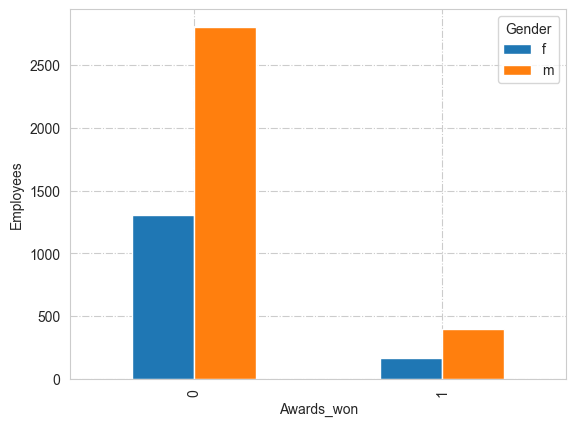

opcion: Average_score_evaluations vs gender


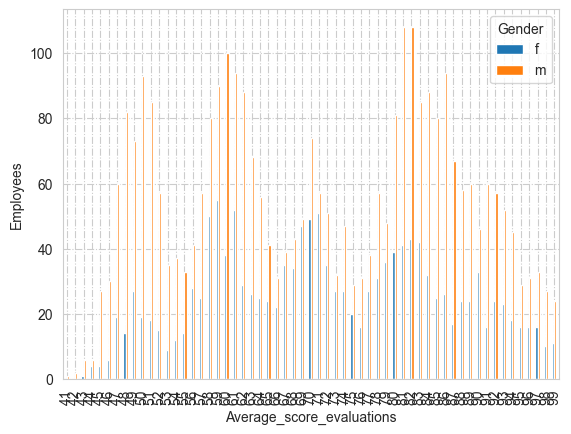

In [197]:
opciones4 = ['Department','Level_of_education','Recruitment_channel','No_of_other_trainings_completed','Age','Performance_Score','Length_of_service', 'High_KPIS','Awards_won','Average_score_evaluations']

for opcion in opciones4:
    print('opcion:', opcion, 'vs gender')
    pd.crosstab(df_ispromoted[opcion], df.Gender).plot(kind="bar")
    plt.ylabel('Employees')
    plt.show()

**-Employees who have missed a maximum of two training sessions should be preferred; more than two are not potentially promotable.**

**-Employees between 26 and 39 are more likely to be promoted than other ages, both men and women.**

**-Employees with performance scores of 3 and 5 have mostly been promoted, employees with 1, 2 and even 4 are not potentially promotable.**

**-Employees with less than 8 years of seniority in the company are mostly promoted; the older they are, the lower the employee promotion, with seniority inversely proportional to the number of promotions.**

**-The number of employees promoted with high KPIS is twice the number of employees promoted without high KPIS, this means that the value of the KPIS measured on the employees directly affects the probability of being promoted.**

**-It is curious that the same does not happen with employees who have won awards in the company, there are much more promoted employees who have not won any awards than those who have won, this means that it does not represent an advantage when it comes to to promote but on the contrary, employees with awards may feel more relaxed and do not put as much effort into promotion tests.**

**-An employee with any average score evaluations can be promoted**


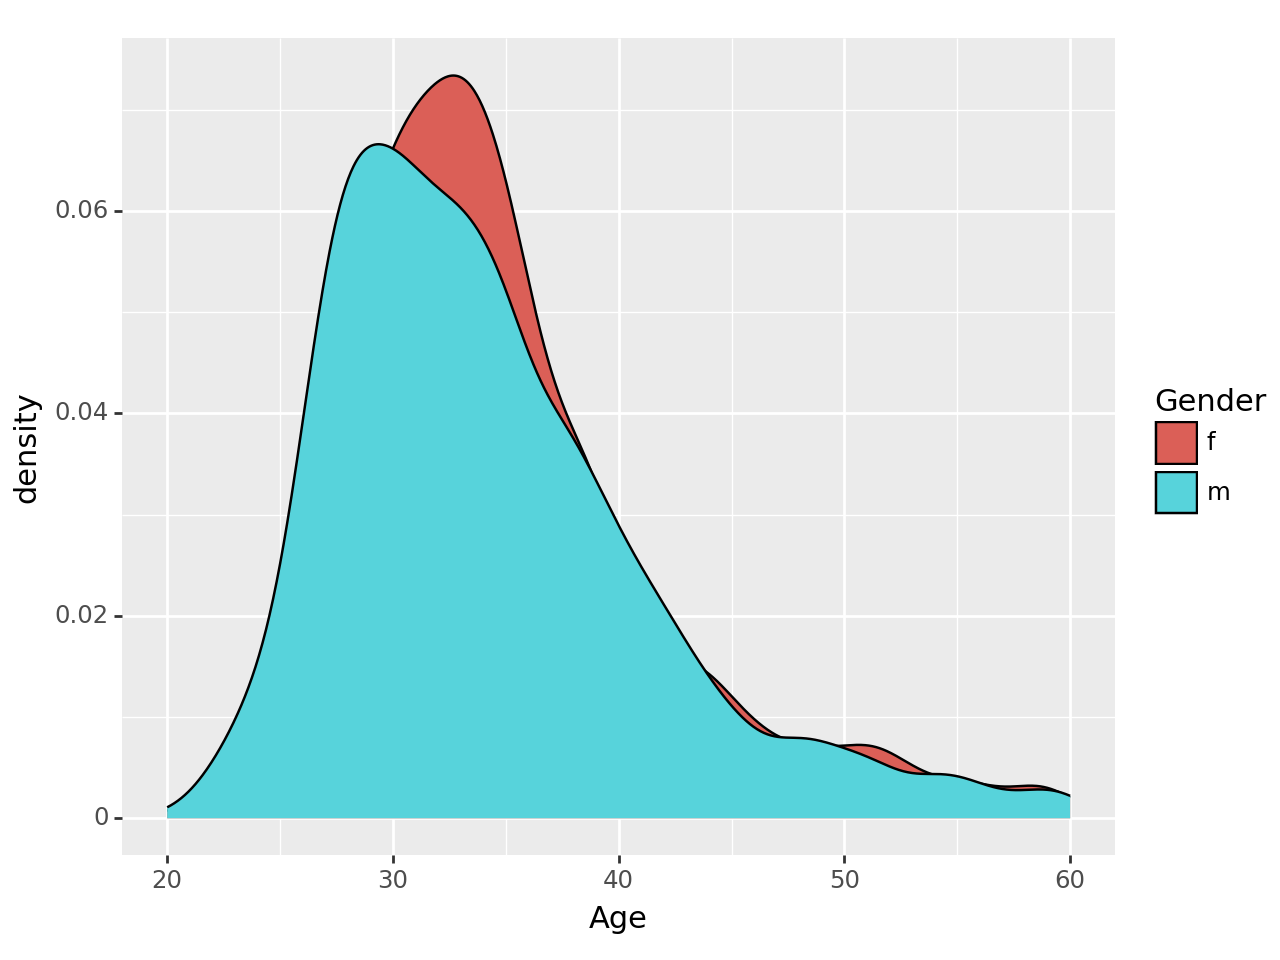

<Figure Size: (640 x 480)>

In [199]:
#Understanding the differences in number of promotion by gender by plotting a bell curve. 
Male = df_ispromoted[df_ispromoted['Gender'] == "m"]
Female = df_ispromoted[df_ispromoted['Gender'] == "f"]

ggplot(data = df_ispromoted, mapping = aes(x = 'Age', fill = 'Gender')) +  geom_density()

**-The age of the company's employees ranges between 20 and 60 years old and although there are promoted employees, employees aged between 25 and 40 are potentially promotable, the number of promoted employees increases from 27 to 35 years old.**

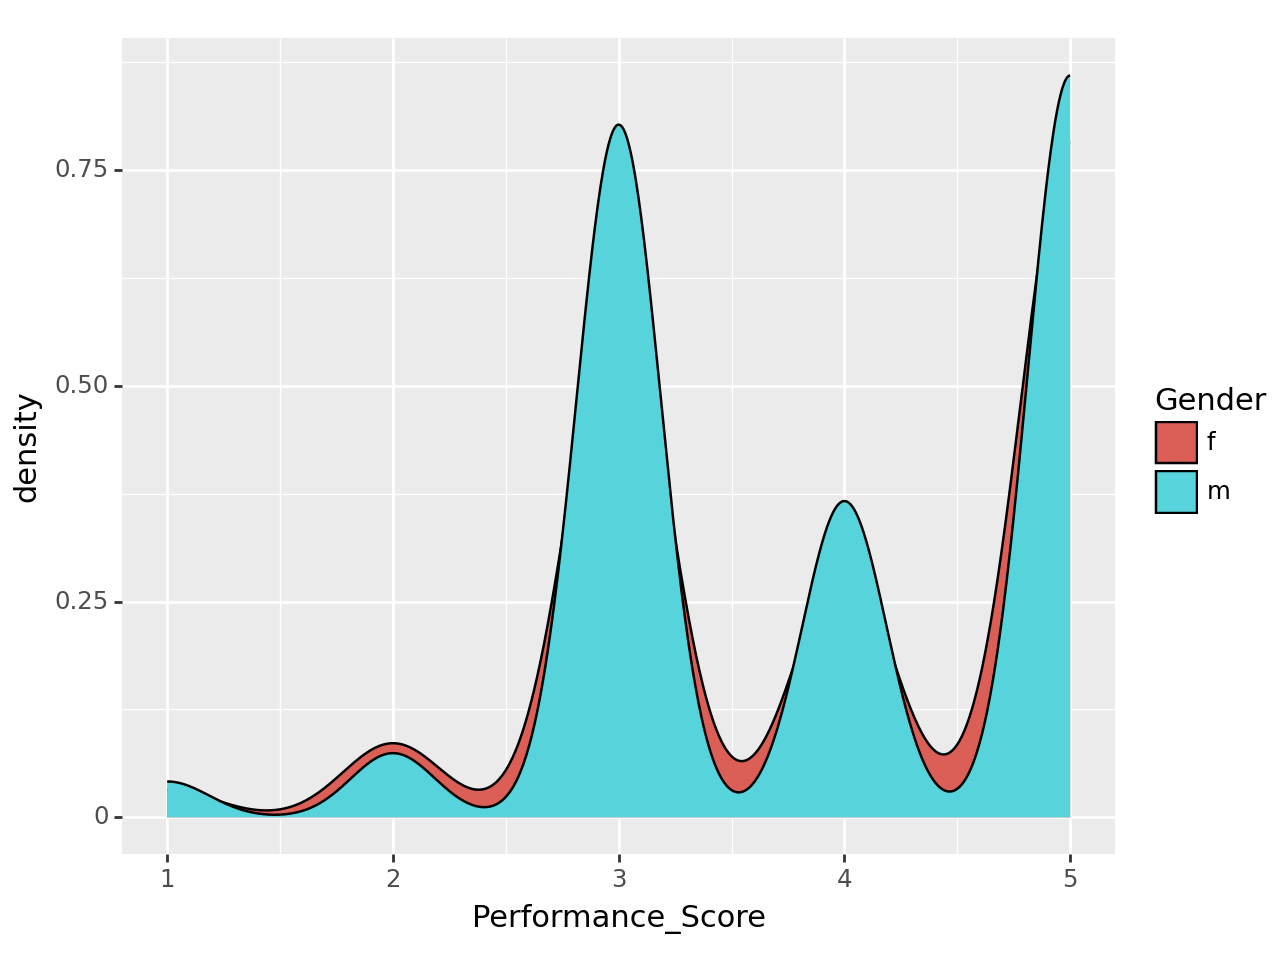

<Figure Size: (640 x 480)>

In [201]:
#Understanding the differences in number of promotion by gender by plotting a bell curve. 
Male = df_ispromoted[df_ispromoted['Gender'] == "m"]
Female = df_ispromoted[df_ispromoted['Gender'] == "f"]

ggplot(data = df_ispromoted, mapping = aes(x = 'Performance_Score', fill = 'Gender')) +  geom_density()

### About recruitment chanel

opcion: Recruitment_channel vs is_promoted 


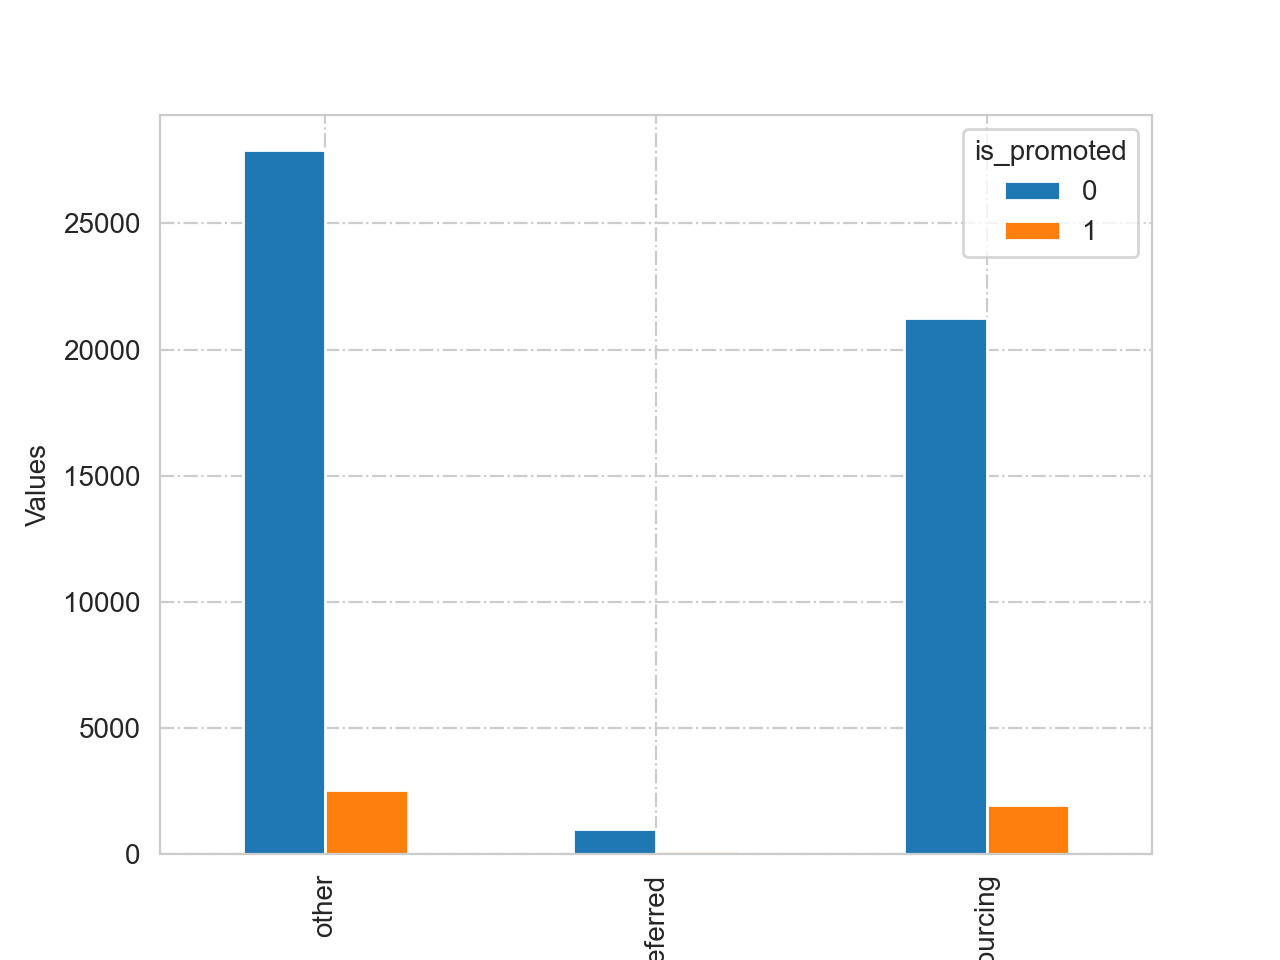

In [203]:
opciones6 = ["Recruitment_channel"]

for opcion in opciones6:
    print('opcion:', opcion, 'vs is_promoted ')
    pd.crosstab(df[opcion], df.is_promoted).plot(kind="bar")
    plt.xlabel('Recruitment_channel')
    plt.ylabel('Values')
    plt.show()

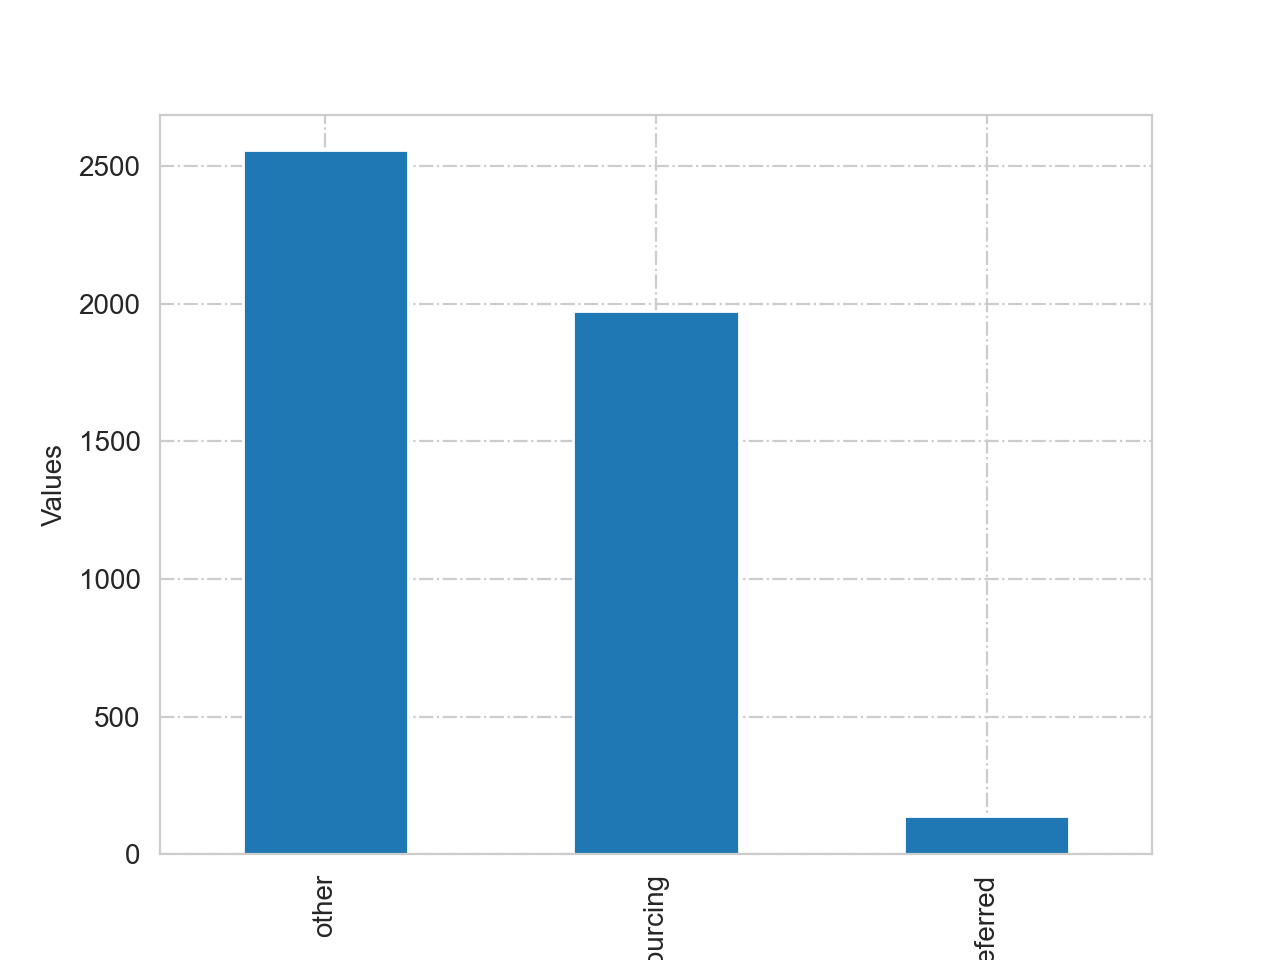

In [204]:
df_ispromoted.Recruitment_channel.value_counts().plot(kind="bar")
plt.xlabel('Recruitment_channel')
plt.ylabel('Values')
plt.show()

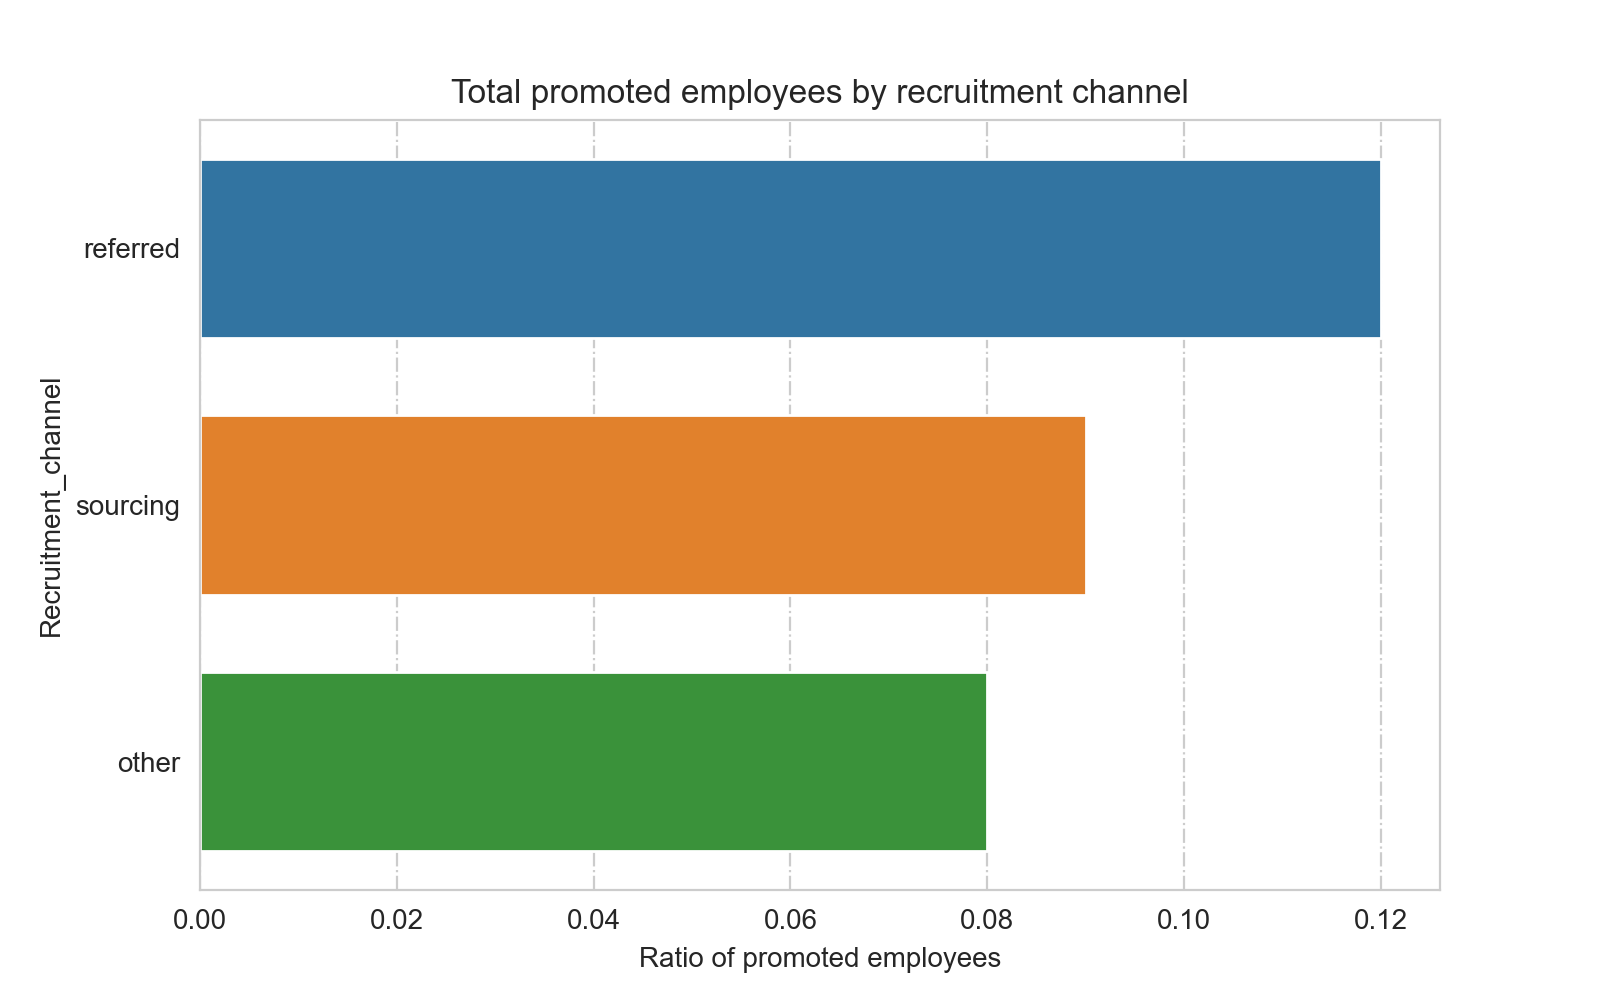

In [205]:
EmpAbs = pd.merge(right=df.groupby(['Recruitment_channel'])[['Emp_ID']].count().reset_index(), left=df.groupby(['Recruitment_channel'])[['is_promoted']].sum().reset_index(), on='Recruitment_channel', how="outer")

EmpAbs['AbsRatio'] = round(EmpAbs['is_promoted']/EmpAbs['Emp_ID'], 2)
EmpAbs.sort_values(by=['AbsRatio'], ascending=False, inplace=True)
plt.figure(figsize=(8, 5))
sns.barplot(EmpAbs, x='AbsRatio', y='Recruitment_channel', width=0.7, orient='h')
plt.title("Total promoted employees by recruitment channel")
plt.xlabel('Ratio of promoted employees');


**-In relation to employees who apply for promotion and those who pass, training to be promoted is more effective in workers who have been employed through a referral, over sourcing and other recruitment channel**

<Axes: xlabel='No_of_other_trainings_completed', ylabel='Density'>

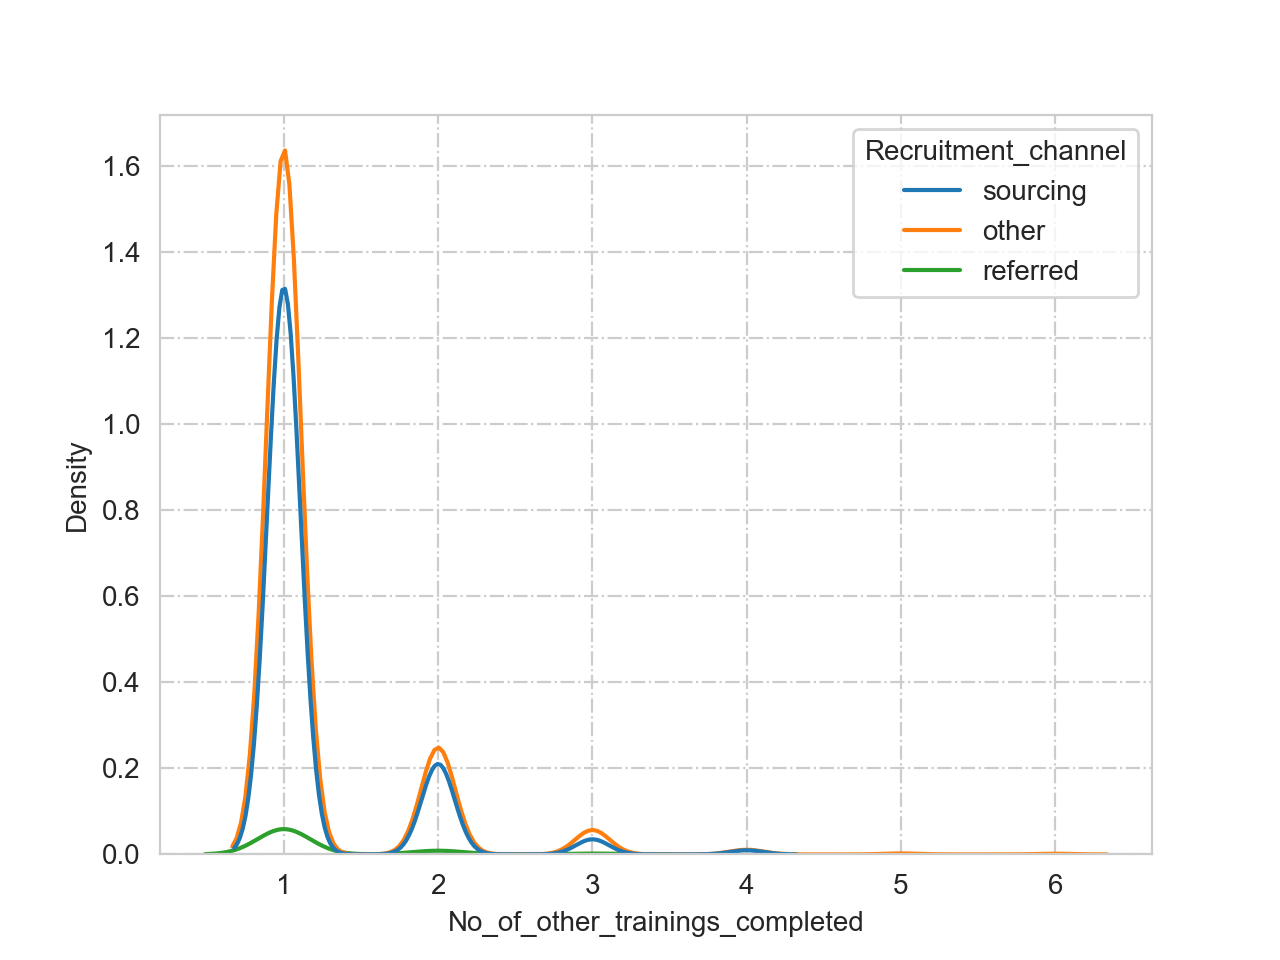

In [206]:
sns.kdeplot(data=df_ispromoted, x="No_of_other_trainings_completed", hue="Recruitment_channel")

**The trend in the number of past trainings completed in promoted employees remains the same for the three recruitment channels used by the company.**

<Axes: xlabel='Length_of_service', ylabel='Density'>

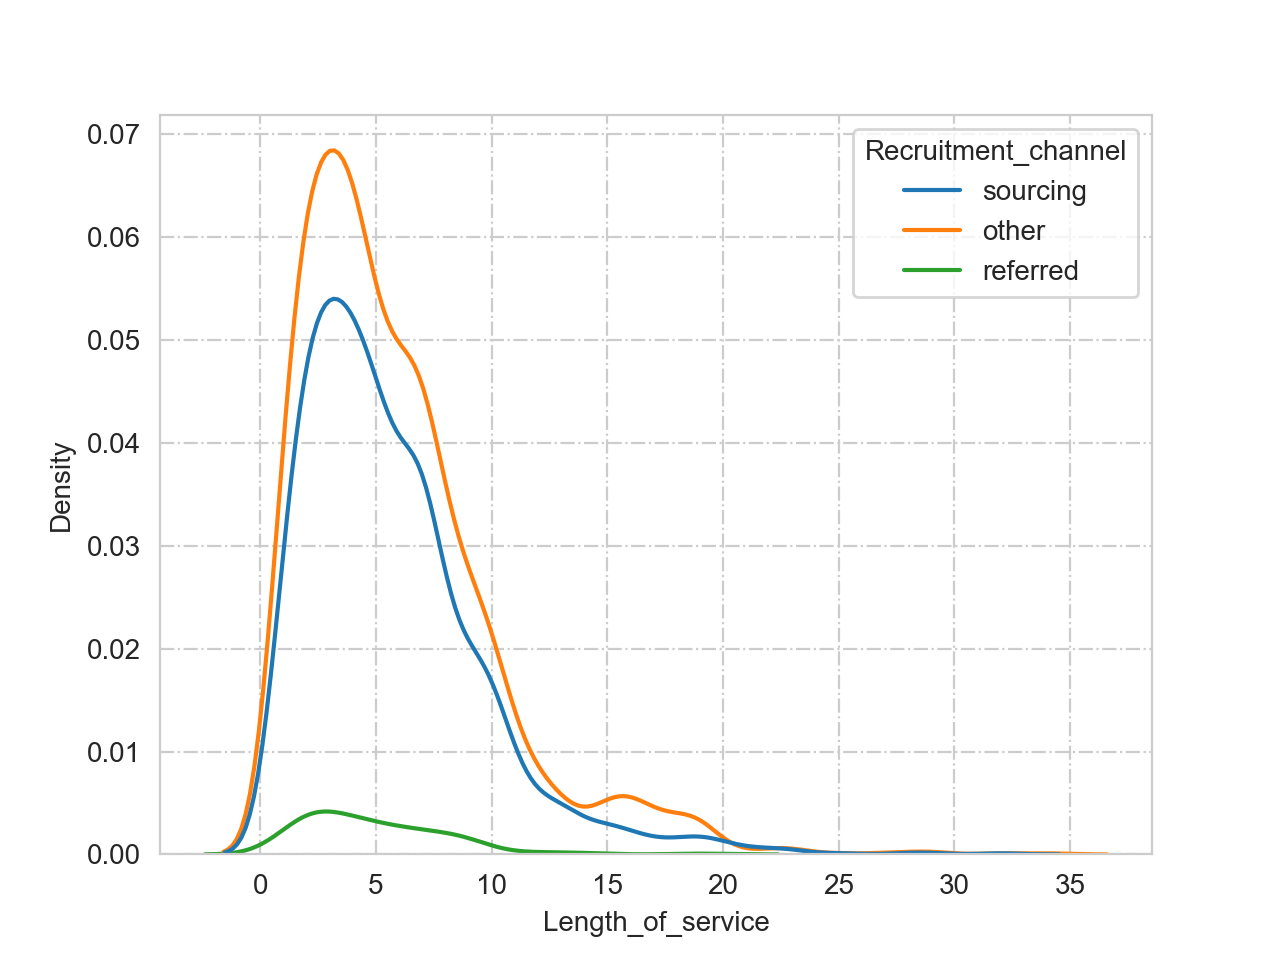

In [207]:
sns.kdeplot(data=df_ispromoted, x="Length_of_service", hue="Recruitment_channel")

**The trend in the length of service in promoted employees remains the same for the three recruitment channels used by the company.**

<Axes: xlabel='Performance_Score', ylabel='Density'>

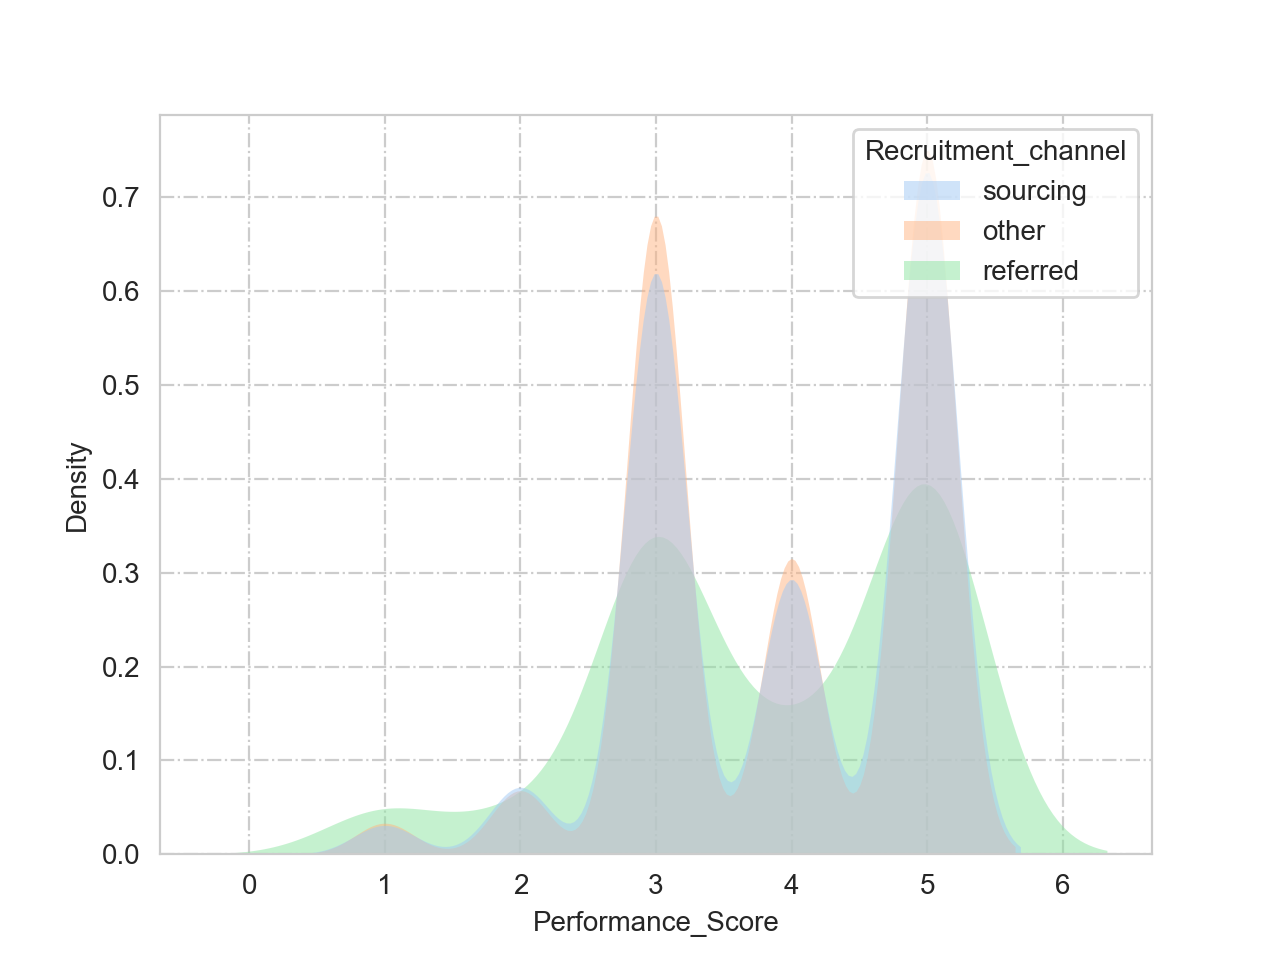

In [208]:
sns.kdeplot(
   data=df_ispromoted, x="Performance_Score", hue="Recruitment_channel",
   fill=True, common_norm=False, palette="pastel",
   alpha=.5, linewidth=0,
)

**The trend in the Performance Score in promoted employees remains the same for the three recruitment channels used by the company.**

### About the level of education


**It is already known that employees with a bachelor's education level have been mostly promoted, now let's see how this characteristic relates to other parameters**

In [209]:
#Level of education and high KPIS

Level of education and: Recruitment_channel


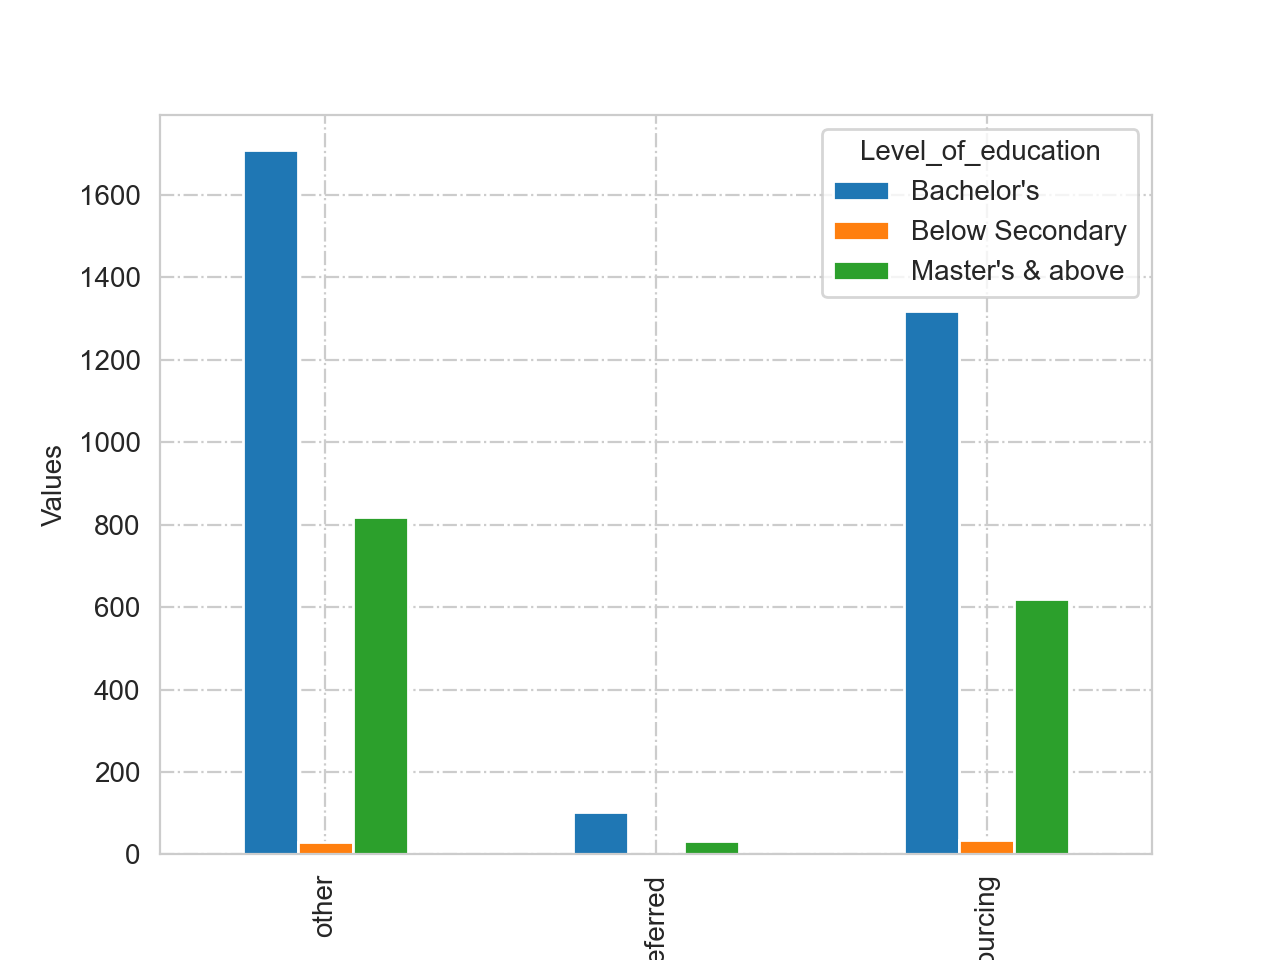

Level of education and: No_of_other_trainings_completed


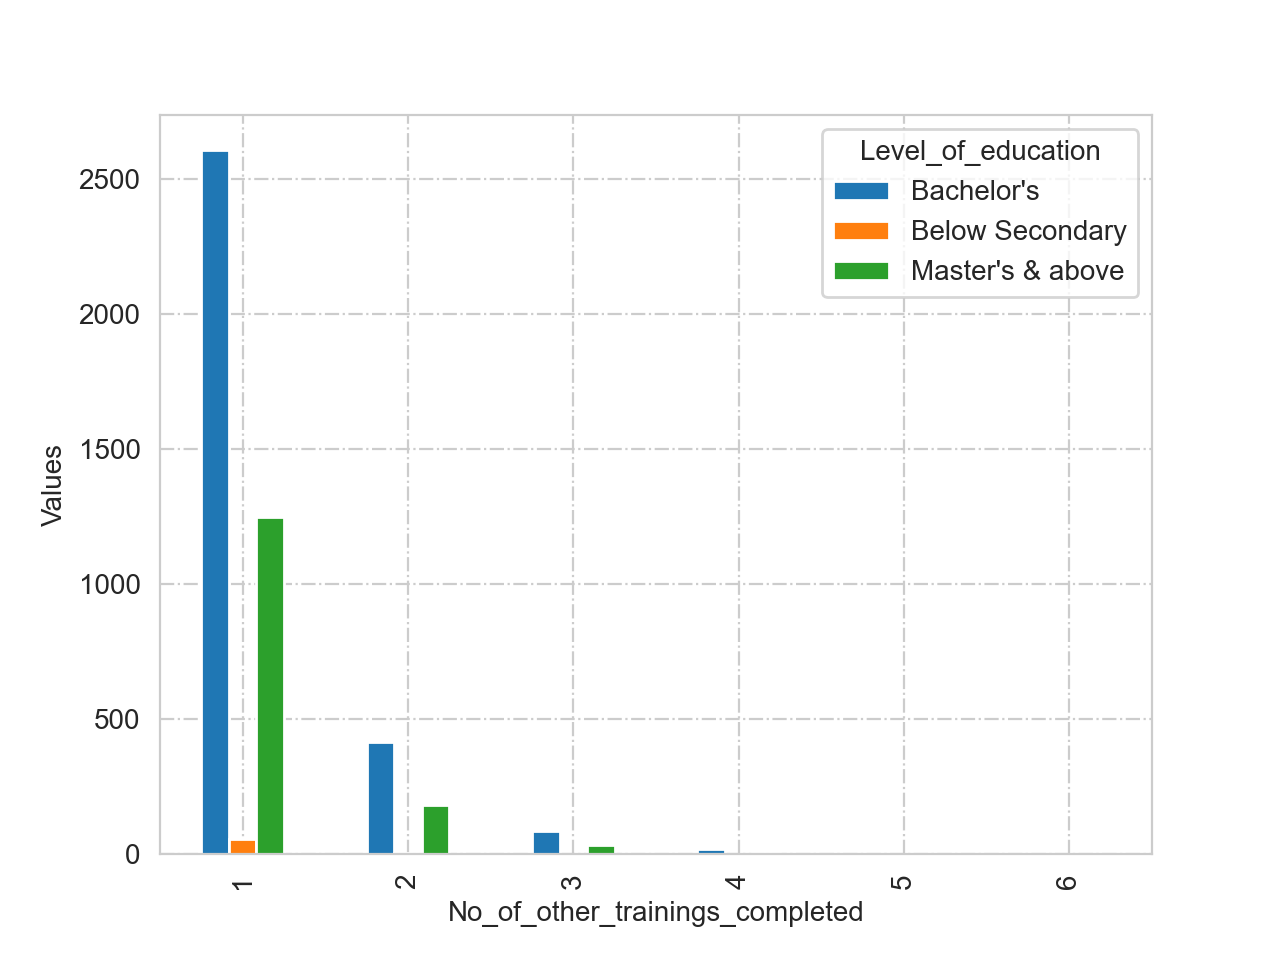

Level of education and: Age


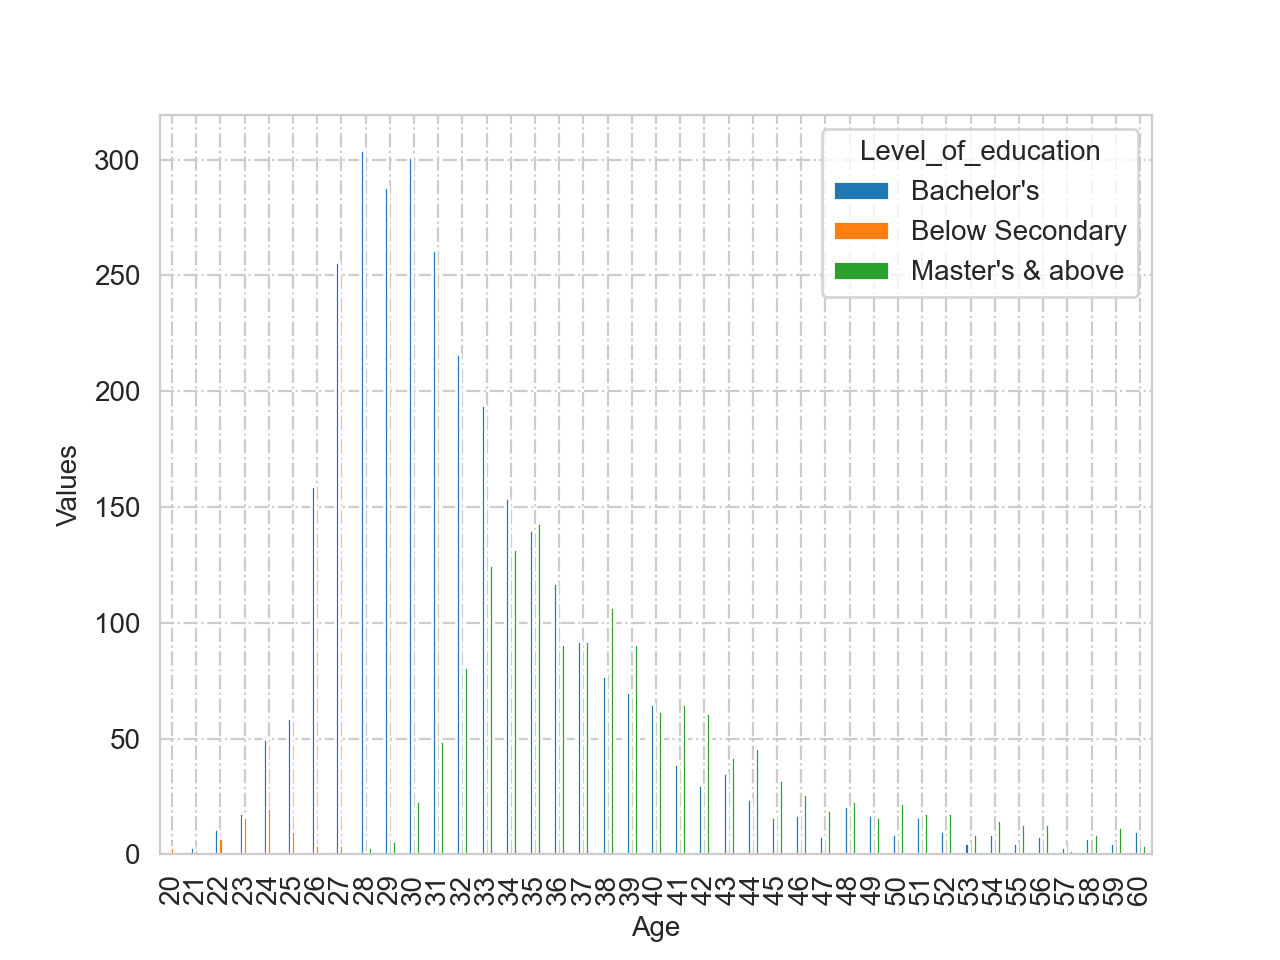

Level of education and: Performance_Score


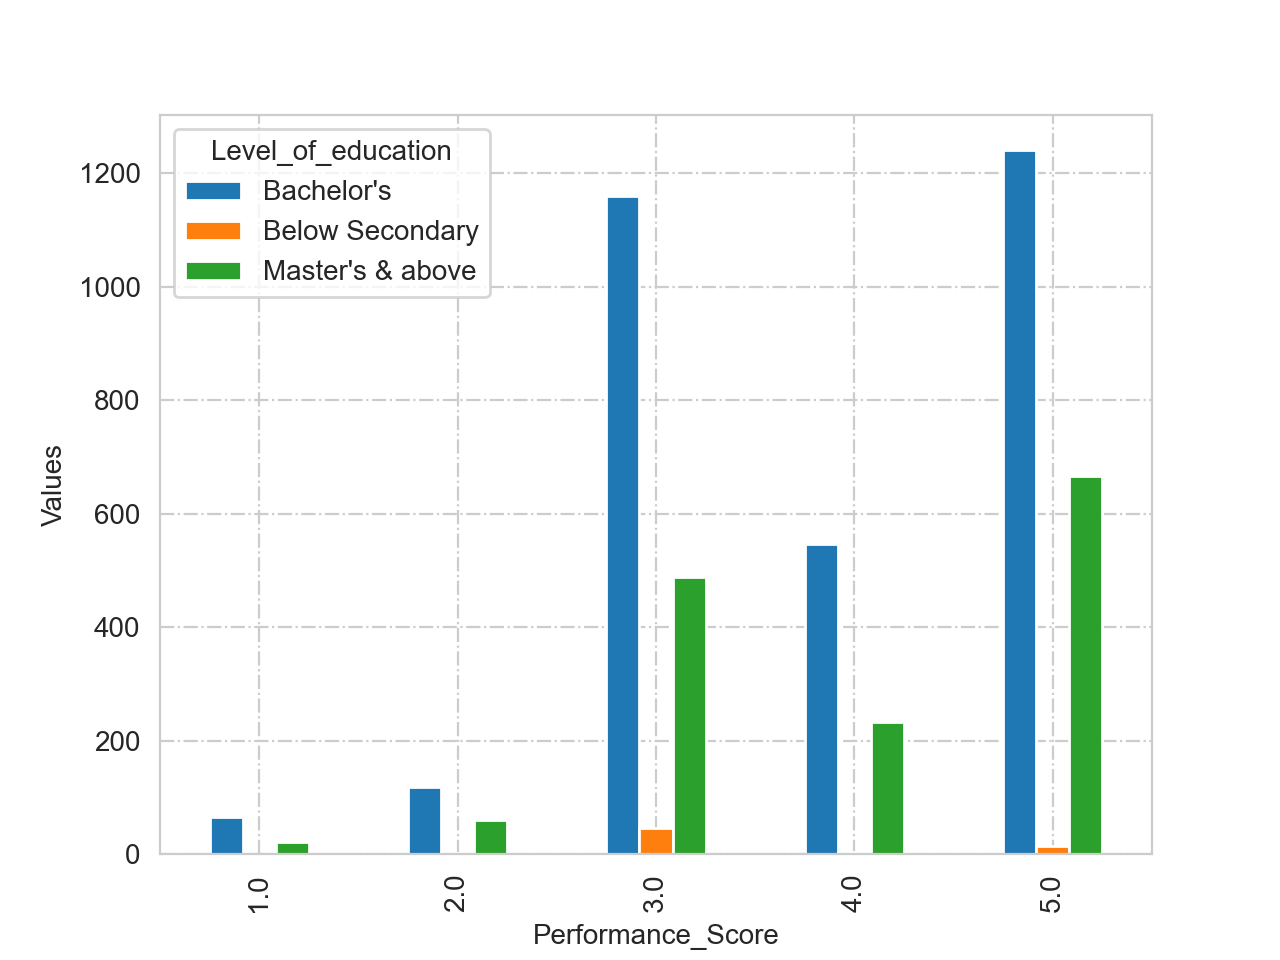

Level of education and: Length_of_service


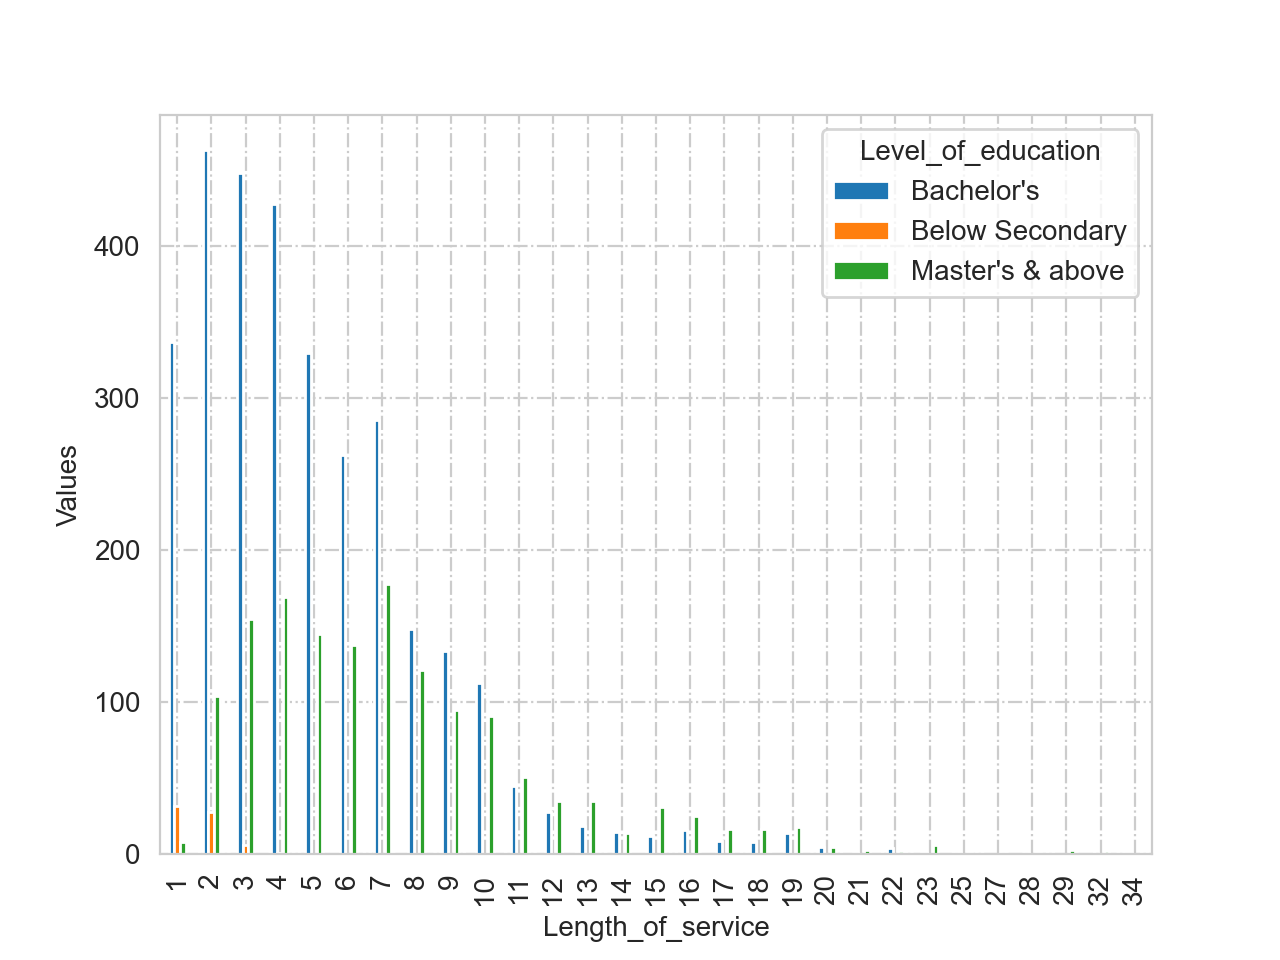

Level of education and: Awards_won


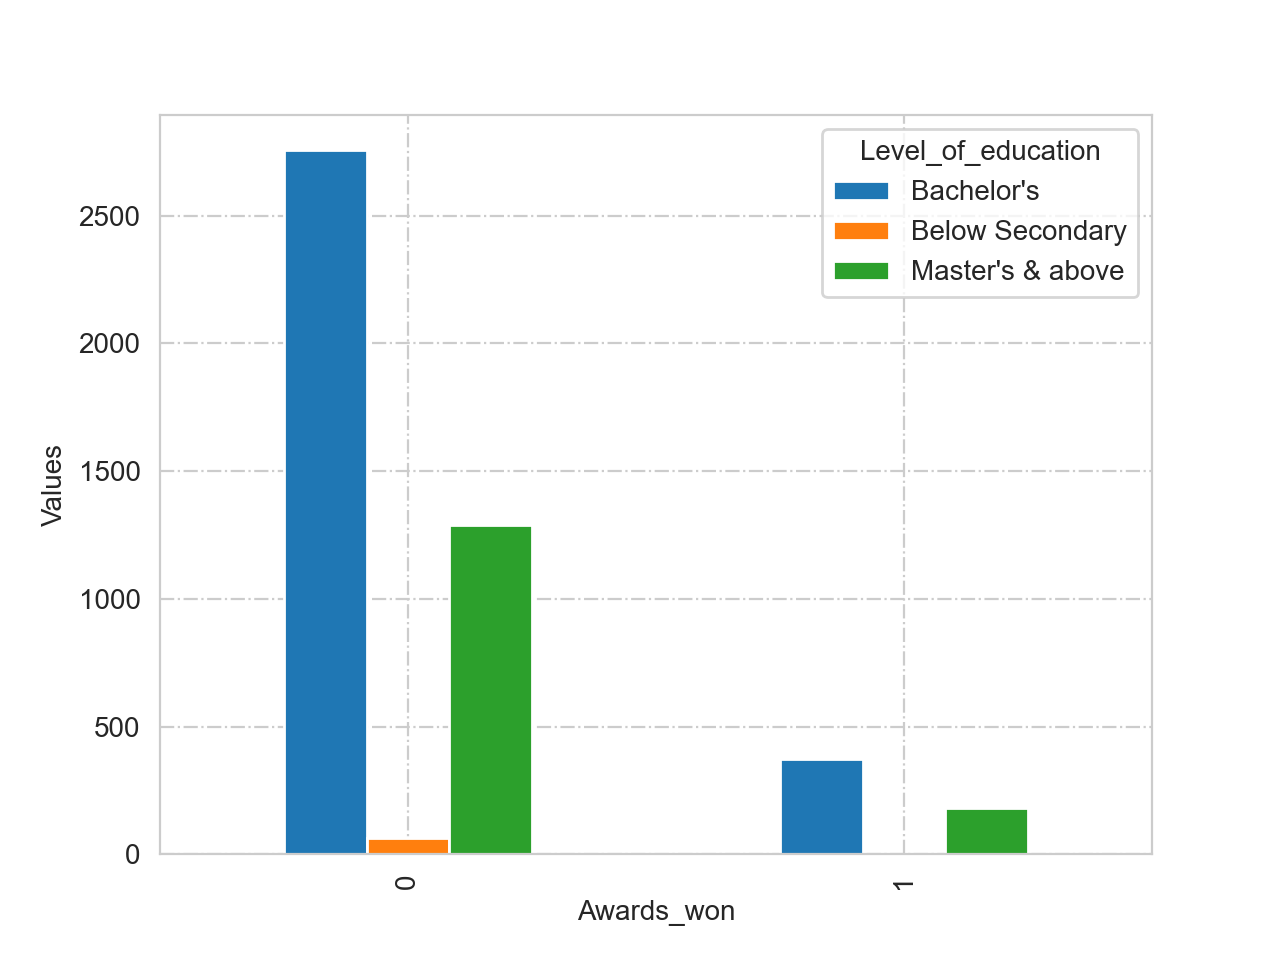

Level of education and: Average_score_evaluations


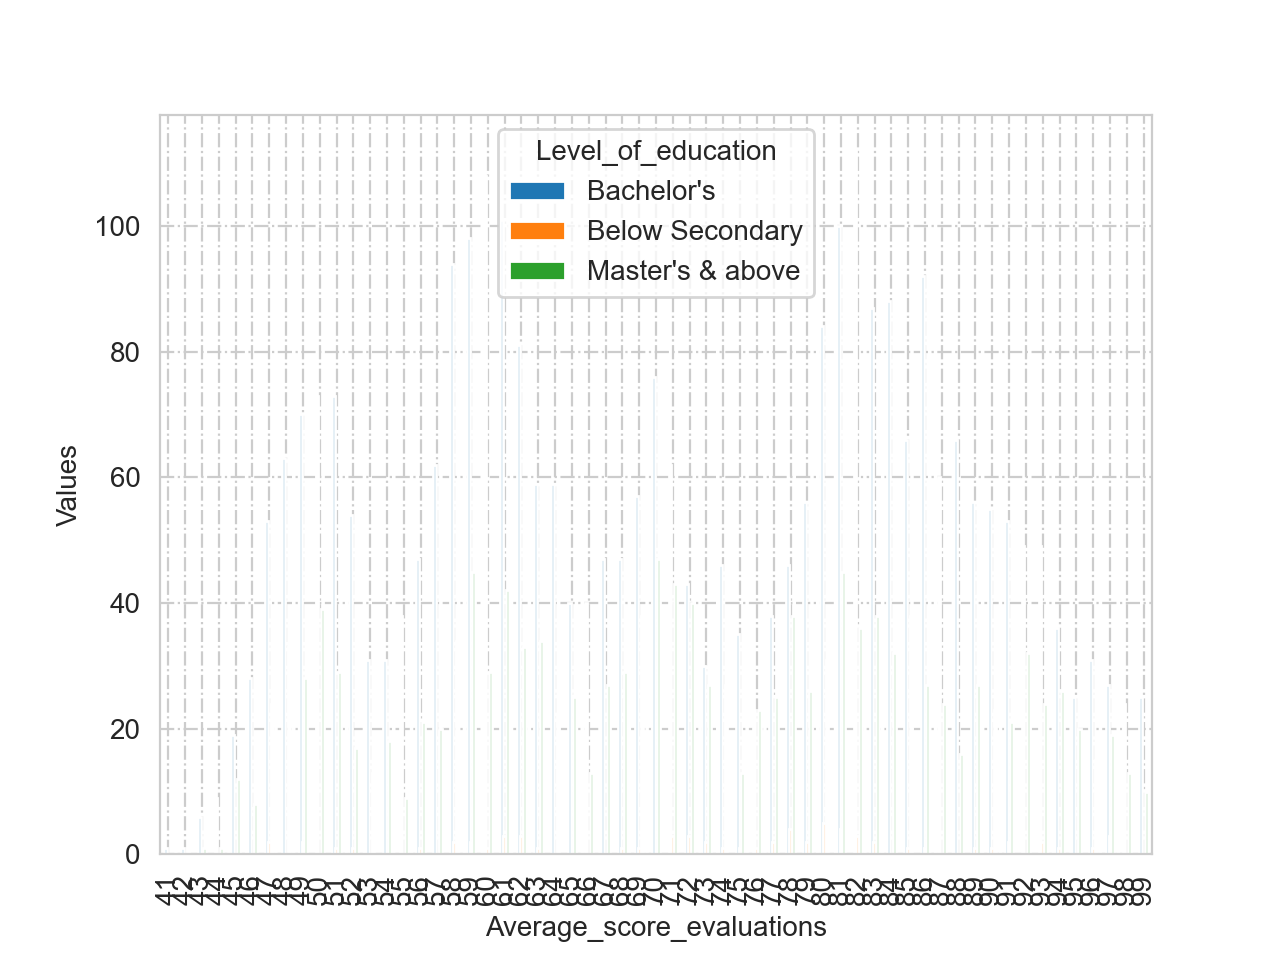

In [210]:
opciones4 = ['Recruitment_channel','No_of_other_trainings_completed','Age','Performance_Score','Length_of_service', 'Awards_won','Average_score_evaluations']

for opcion in opciones4:
    print('Level of education'' and:', opcion, )
    pd.crosstab(df_ispromoted[opcion], df.Level_of_education).plot(kind="bar")
    plt.ylabel('Values')
    plt.show()

**Regarding the level of education of the employees, the vast majority of employees promoted with only 1 and 2 training sessions missed only had a bachelor's degree, and not a master's degree, that is, having a master's degree does not indicate a greater probability of promotion.**

In [211]:
df


Emp_ID         Department No_of_Region Level_of_education Gender  \
0       65438  Sales & Marketing     region_7   Master's & above      f   
1       65141         Operations    region_22         Bachelor's      m   
2        7513  Sales & Marketing    region_19         Bachelor's      m   
3        2542  Sales & Marketing    region_23         Bachelor's      m   
4       48945         Technology    region_26         Bachelor's      m   
...       ...                ...          ...                ...    ...   
54803    3030         Technology    region_14         Bachelor's      m   
54804   74592         Operations    region_27   Master's & above      f   
54805   13918          Analytics     region_1         Bachelor's      m   
54806   13614  Sales & Marketing     region_9         Bachelor's      m   
54807   51526                 HR    region_22         Bachelor's      m   

      Recruitment_channel  No_of_other_trainings_completed  Age  \
0                sourcing                                1   35   
1                   other                                1   30   
2                sourcing                                1   34   
3                   other                                2   39   
4                   other                                1   45   
...                   ...                              ...  ...   
54803            sourcing                                1   48   
54804               other                                1   37   
54805               other                                1   27   
54806            sourcing                                1   29   
54807               other                                1   27   

       Performance_Score  Length_of_service  High_KPIS  Awards_won  \
0                    5.0                  8          1           0   
1                    5.0                  4          0           0   
2                    3.0                  7          0           0   
3                    1.0                 10          0           0   
4                    3.0                  2          0           0   
...                  ...                ...        ...         ...   
54803                3.0                 17          0           0   
54804                2.0                  6          0           0   
54805                5.0                  3          1           0   
54806                1.0                  2          0           0   
54807                1.0                  5          0           0   

       Average_score_evaluations  is_promoted  
0                             49            0  
1                             60            0  
2                             50            0  
3                             50            0  
4                             73            0  
...                          ...          ...  
54803                         78            0  
54804                         56            0  
54805                         79            0  
54806                         45            0  
54807                         49            0  

[54808 rows x 14 columns]

In [212]:
my_df = df.select_dtypes(exclude=[object])

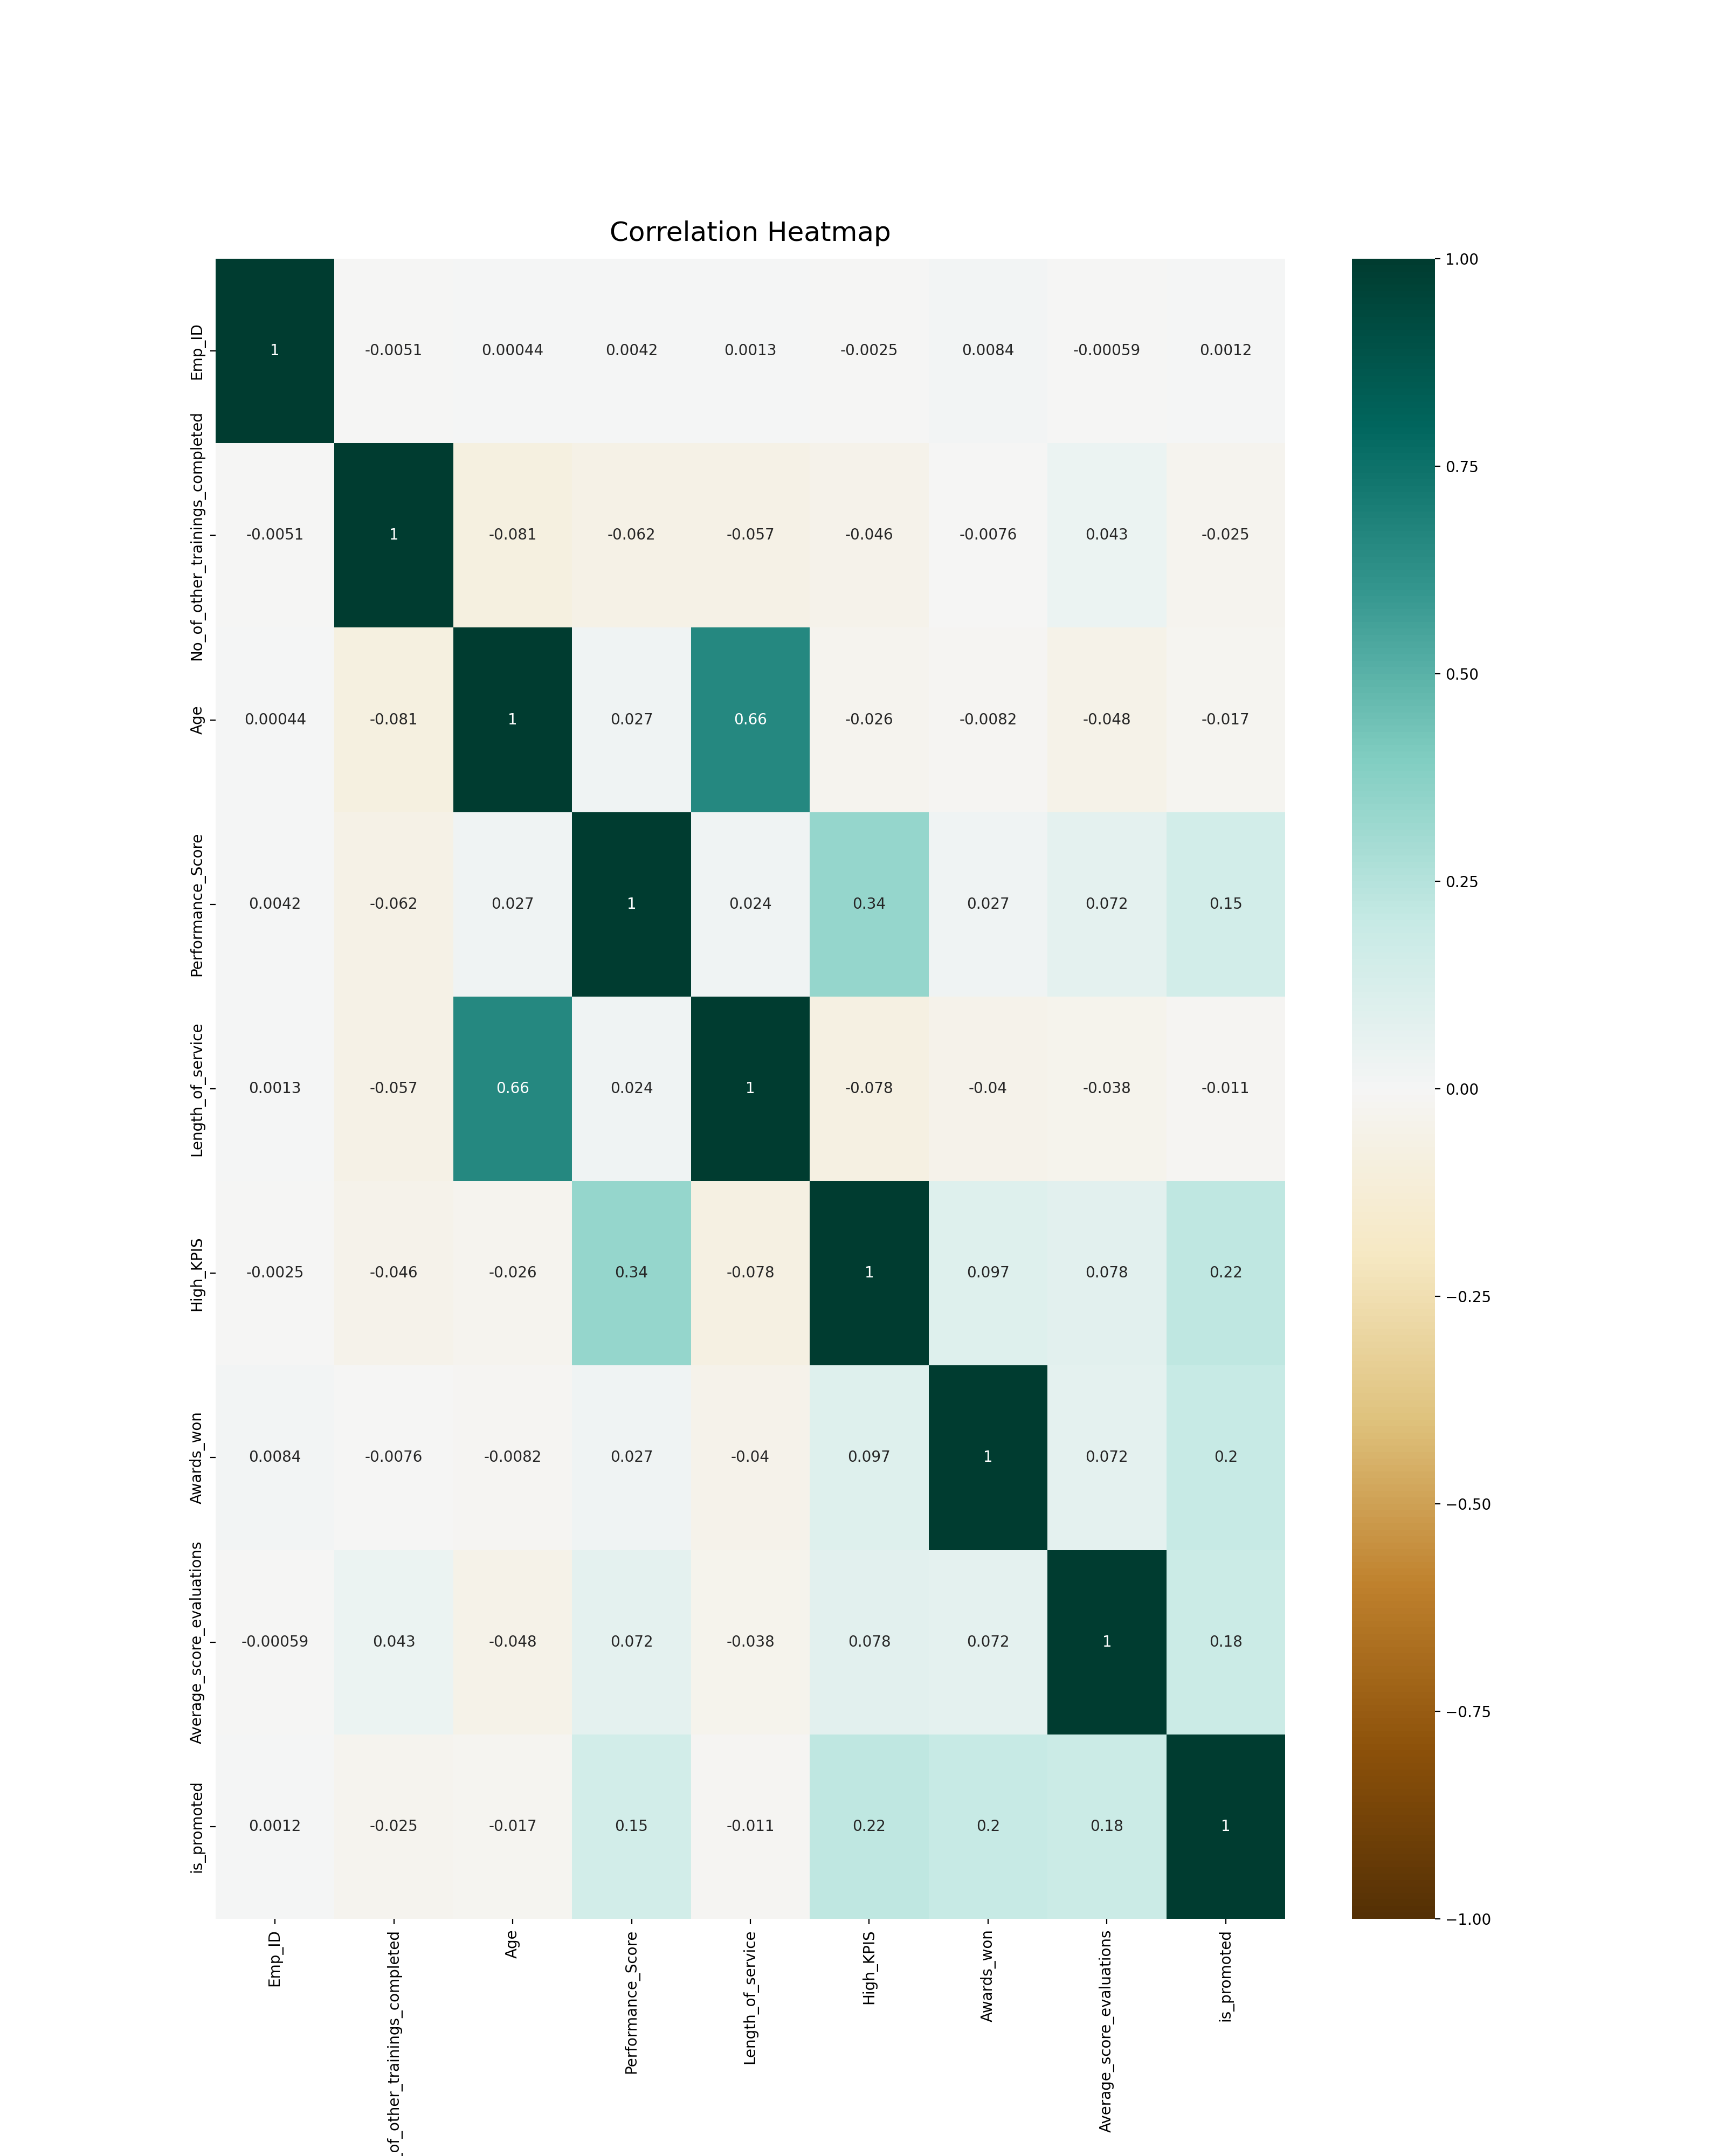

In [52]:
plt.figure(figsize=(16, 20))
heatmap = sns.heatmap(my_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

**From the data matrix it can be concluded that of all the employee features, those that have the most relationship with employee promotion are:**

   **-Performance score, High KPIS,  Average score evaluations.**
    

## Build & Training a Machine Learning Algorithm:

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Emp_ID                           54808 non-null  int64  
 1   Department                       54808 non-null  object 
 2   No_of_Region                     54808 non-null  object 
 3   Level_of_education               54808 non-null  object 
 4   Gender                           54808 non-null  object 
 5   Recruitment_channel              54808 non-null  object 
 6   No_of_other_trainings_completed  54808 non-null  int64  
 7   Age                              54808 non-null  int64  
 8   Performance_Score                54808 non-null  float64
 9   Length_of_service                54808 non-null  int64  
 10  High_KPIS                        54808 non-null  int64  
 11  Awards_won                       54808 non-null  int64  
 12  Average_score_eval

In [88]:
df.to_excel('dfhr1.xlsx')

In [89]:
df.Level_of_education = df.Level_of_education.replace({"Master's & above": "Master"})

In [55]:
#change categorical variables to numerical variables

df.Department = df.Department.map({'Analytics': 0, 'Finance': 1, 'HR': 2, 'Legal': 3,'Operations': 4,'Procurement': 5,'R&D': 6,'Sales & Marketing': 7, 'Technology': 8 })
df.No_of_Region = df.No_of_Region.map({'region_1': 1, 'region_2': 2, 'region_3': 3, 'region_4': 4,'region_5': 5,'region_6': 6,'region_7': 7,'region_8': 8, 'region_9': 9,'region_10': 10,'region_11': 11,'region_12': 12, 'region_13' :13,'region_14': 14, 'region_15': 15, 'region_16': 16, 'region_17': 17,'region_18': 18,'region_19': 19,'region_20': 20,'region_21': 21, 'region_22': 22,'region_23': 23,'region_24': 24,'region_25': 25, 'region_26': 26, 'region_27': 27,'region_28': 28,'region_29': 29,'region_30': 30, 'region_31': 31,'region_32': 32,'region_33': 33,'region_34': 34 })
df.Level_of_education   = df.Level_of_education.map({"Bachelor's": 0,'Below Secondary': 1, 'Master': 2})
df.Gender = df.Gender.map({"f": 0, 'm': 1})
df.Recruitment_channel = df.Recruitment_channel.map({"other": 0, 'referred': 1,"sourcing":2 })                                 
  
  
df.head()

Emp_ID  Department  No_of_Region  Level_of_education  Gender  \
0   65438           7             7                   2       0   
1   65141           4            22                   0       1   
2    7513           7            19                   0       1   
3    2542           7            23                   0       1   
4   48945           8            26                   0       1   

   Recruitment_channel  No_of_other_trainings_completed  Age  \
0                    2                                1   35   
1                    0                                1   30   
2                    2                                1   34   
3                    0                                2   39   
4                    0                                1   45   

   Performance_Score  Length_of_service  High_KPIS  Awards_won  \
0                5.0                  8          1           0   
1                5.0                  4          0           0   
2                3.0                  7          0           0   
3                1.0                 10          0           0   
4                3.0                  2          0           0   

   Average_score_evaluations  is_promoted  
0                         49            0  
1                         60            0  
2                         50            0  
3                         50            0  
4                         73            0

In [56]:
# drop the 'Emp_ID' column from the DataFrame to create the feature matrix
X = df.drop(["Emp_ID", "is_promoted"], axis = 1)
X.head()

Department  No_of_Region  Level_of_education  Gender  Recruitment_channel  \
0           7             7                   2       0                    2   
1           4            22                   0       1                    0   
2           7            19                   0       1                    2   
3           7            23                   0       1                    0   
4           8            26                   0       1                    0   

   No_of_other_trainings_completed  Age  Performance_Score  Length_of_service  \
0                                1   35                5.0                  8   
1                                1   30                5.0                  4   
2                                1   34                3.0                  7   
3                                2   39                1.0                 10   
4                                1   45                3.0                  2   

   High_KPIS  Awards_won  Average_score_evaluations  
0          1           0                         49  
1          0           0                         60  
2          0           0                         50  
3          0           0                         50  
4          0           0                         73

In [57]:
# create the target vector
y = df["is_promoted"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [68]:
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
# check shape
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


x_train:  (43846, 12)
x_test:  (10962, 12)
y_train:  (43846,)
y_test:  (10962,)


### Build prediction Models

In [ ]:
#training Model predictions 
dtc_model = DecisionTreeClassifier()
log_model = LogisticRegression(max_iter=10000)
rfc_model = RandomForestClassifier()
gsn_model = GaussianNB()
svc_model = SVC()
dtc_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)
gsn_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)

In [71]:
# create a dictionary of models
models = {
    "dtc_model":DecisionTreeClassifier(),
    "log_model": LogisticRegression(),
    "rfc_mode": RandomForestClassifier(),
    "gsn_mode": GaussianNB(),
    "svc_model": SVC(),
   
}

# loop through the models and fit each one to the training data
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

dtc_model trained.


C:\Users\ostab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


log_model trained.
rfc_mode trained.
gsn_mode trained.
svc_model trained.


dtc_model Accuracy: 89.68%


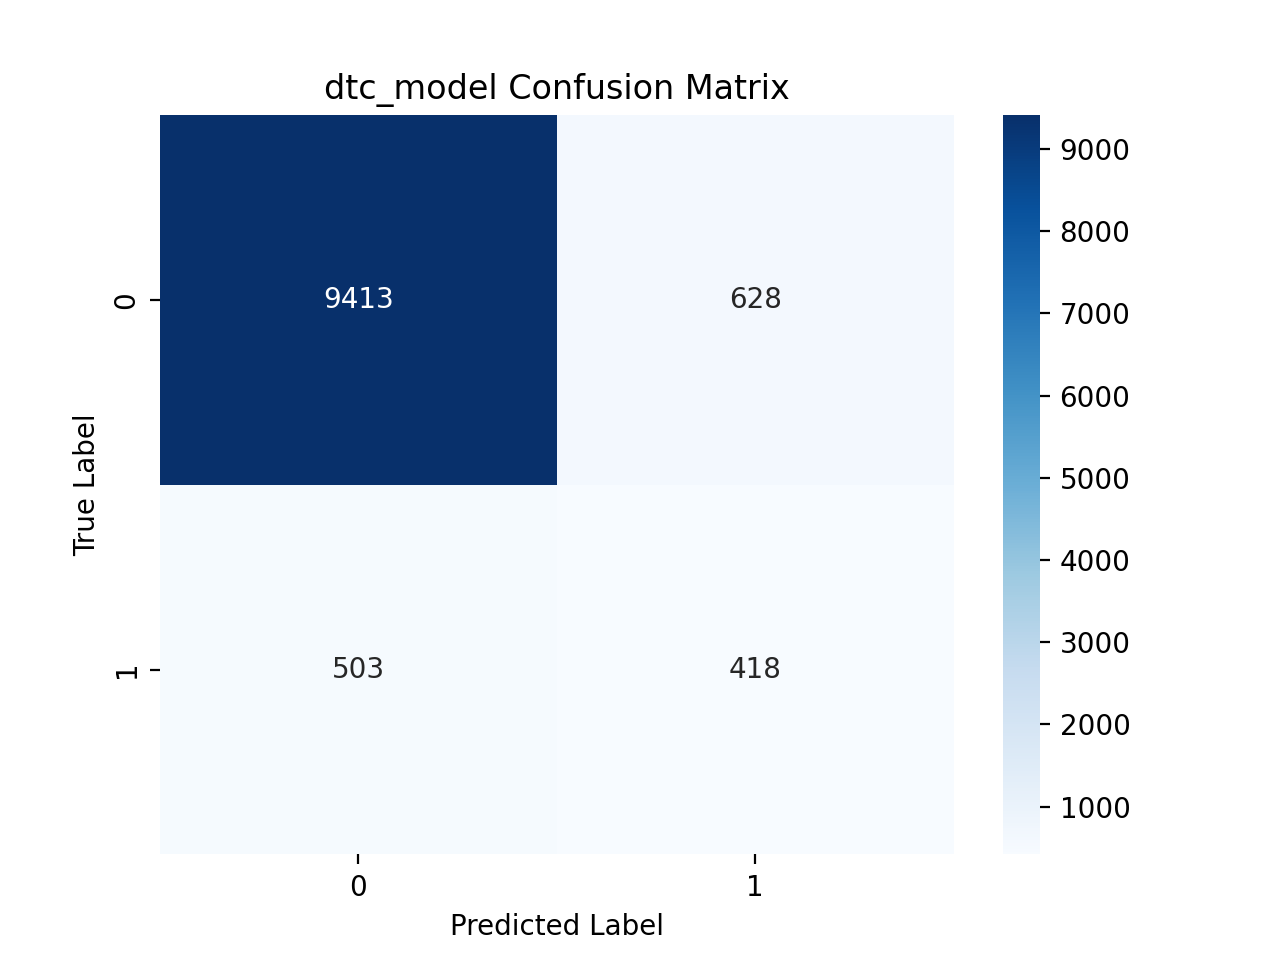

dtc_model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10041
           1       0.40      0.45      0.43       921

    accuracy                           0.90     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.90      0.90     10962

[[9413  628]
 [ 503  418]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10041
           1       0.40      0.45      0.43       921

    accuracy                           0.90     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.90      0.90     10962

log_model Accuracy: 91.61%


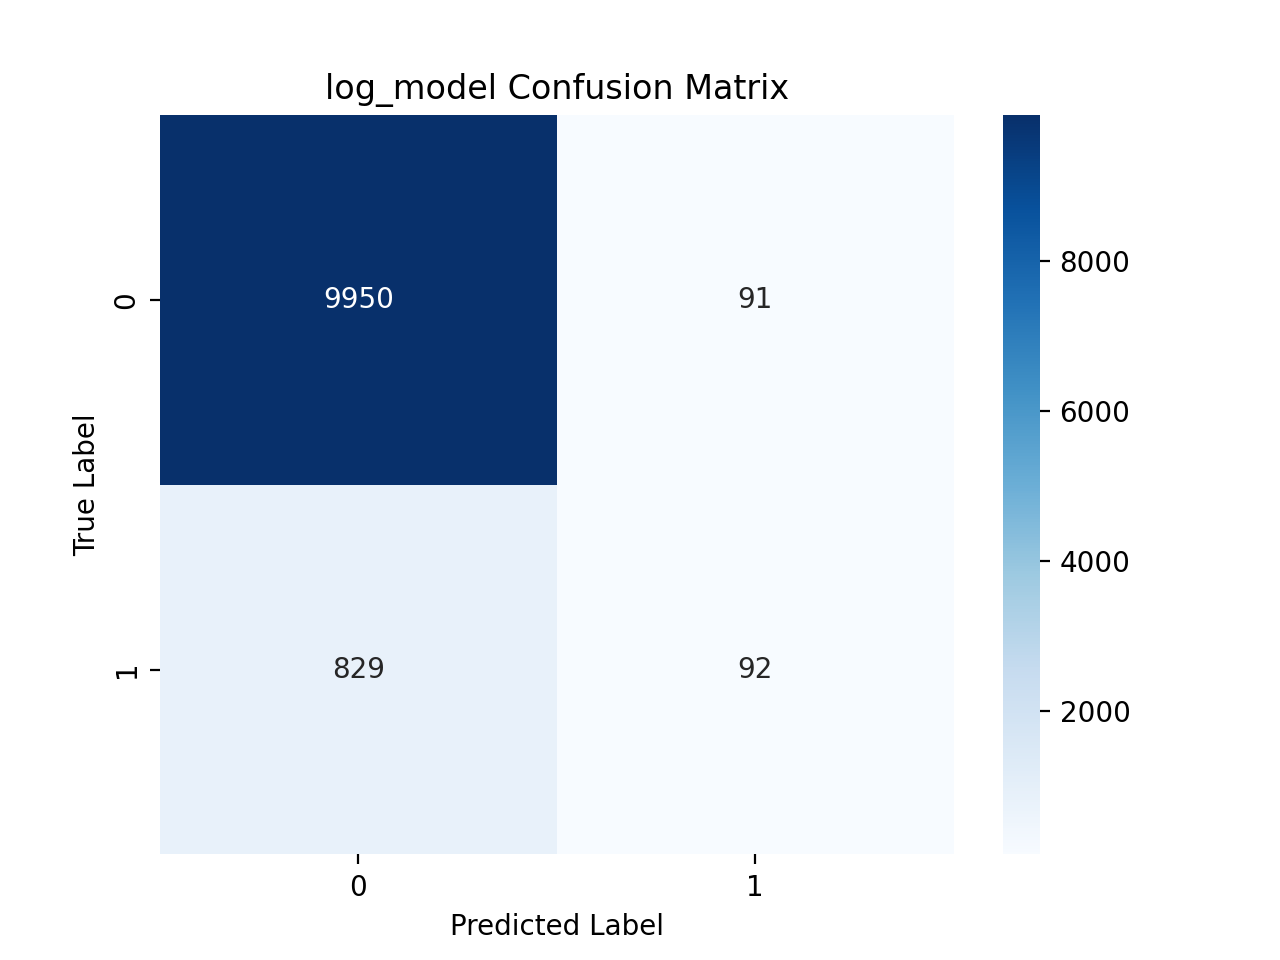

log_model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10041
           1       0.50      0.10      0.17       921

    accuracy                           0.92     10962
   macro avg       0.71      0.55      0.56     10962
weighted avg       0.89      0.92      0.89     10962

[[9950   91]
 [ 829   92]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10041
           1       0.50      0.10      0.17       921

    accuracy                           0.92     10962
   macro avg       0.71      0.55      0.56     10962
weighted avg       0.89      0.92      0.89     10962

rfc_mode Accuracy: 93.45%


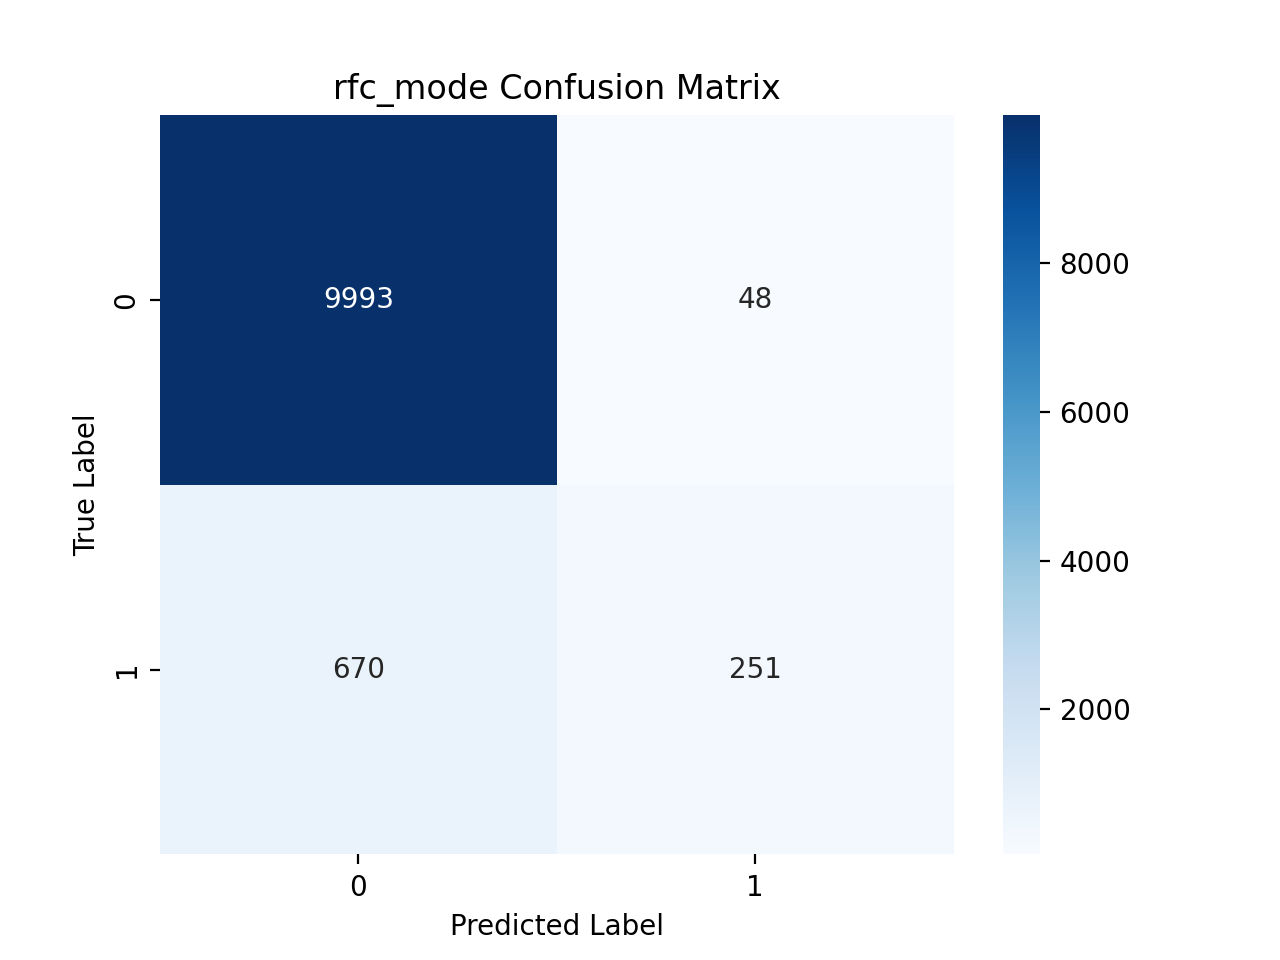

rfc_mode Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10041
           1       0.84      0.27      0.41       921

    accuracy                           0.93     10962
   macro avg       0.89      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962

[[9993   48]
 [ 670  251]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10041
           1       0.84      0.27      0.41       921

    accuracy                           0.93     10962
   macro avg       0.89      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962

gsn_mode Accuracy: 91.45%


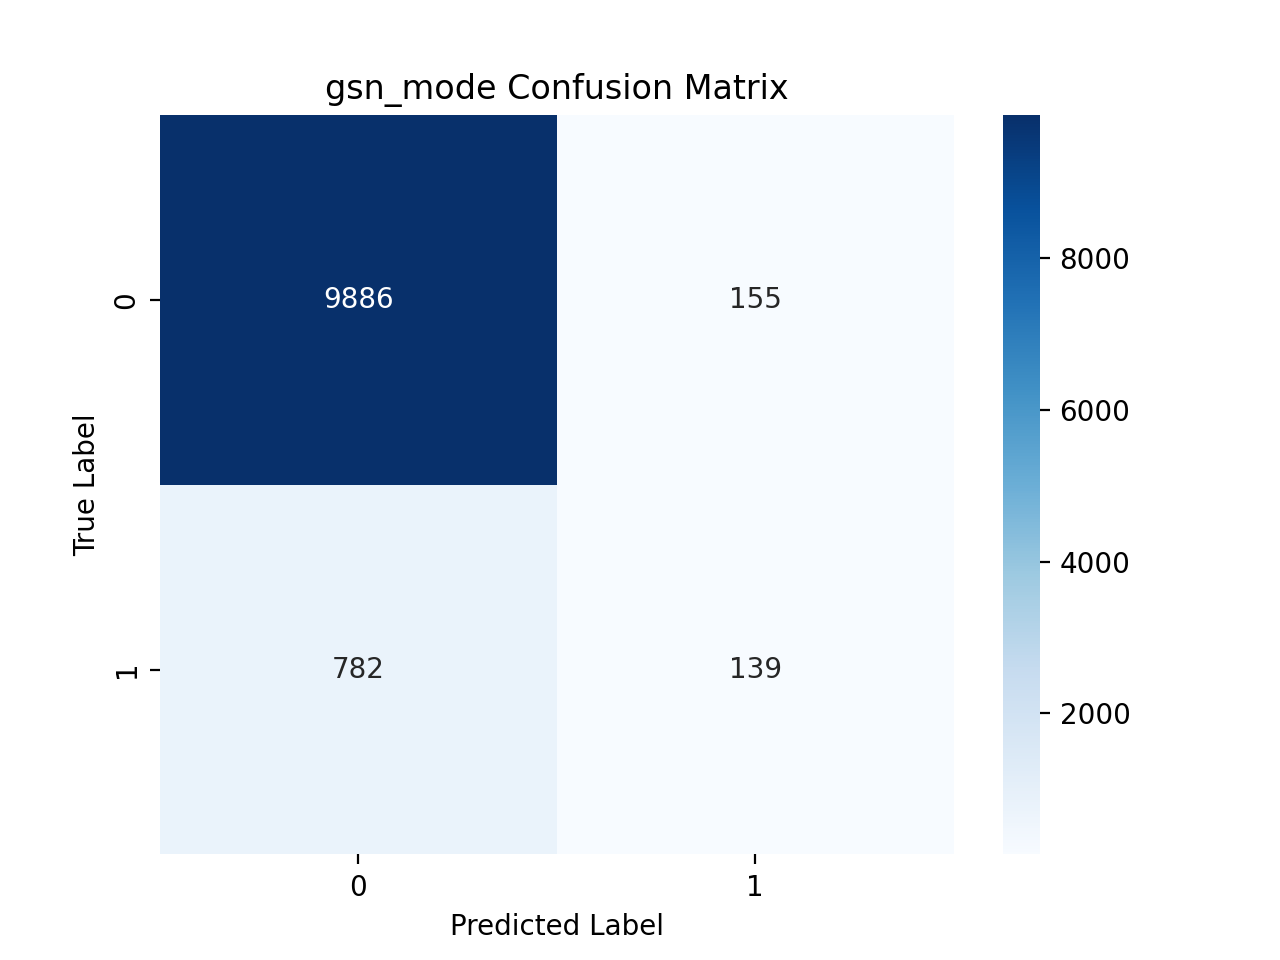

gsn_mode Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10041
           1       0.47      0.15      0.23       921

    accuracy                           0.91     10962
   macro avg       0.70      0.57      0.59     10962
weighted avg       0.89      0.91      0.89     10962

[[9886  155]
 [ 782  139]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10041
           1       0.47      0.15      0.23       921

    accuracy                           0.91     10962
   macro avg       0.70      0.57      0.59     10962
weighted avg       0.89      0.91      0.89     10962

svc_model Accuracy: 91.60%


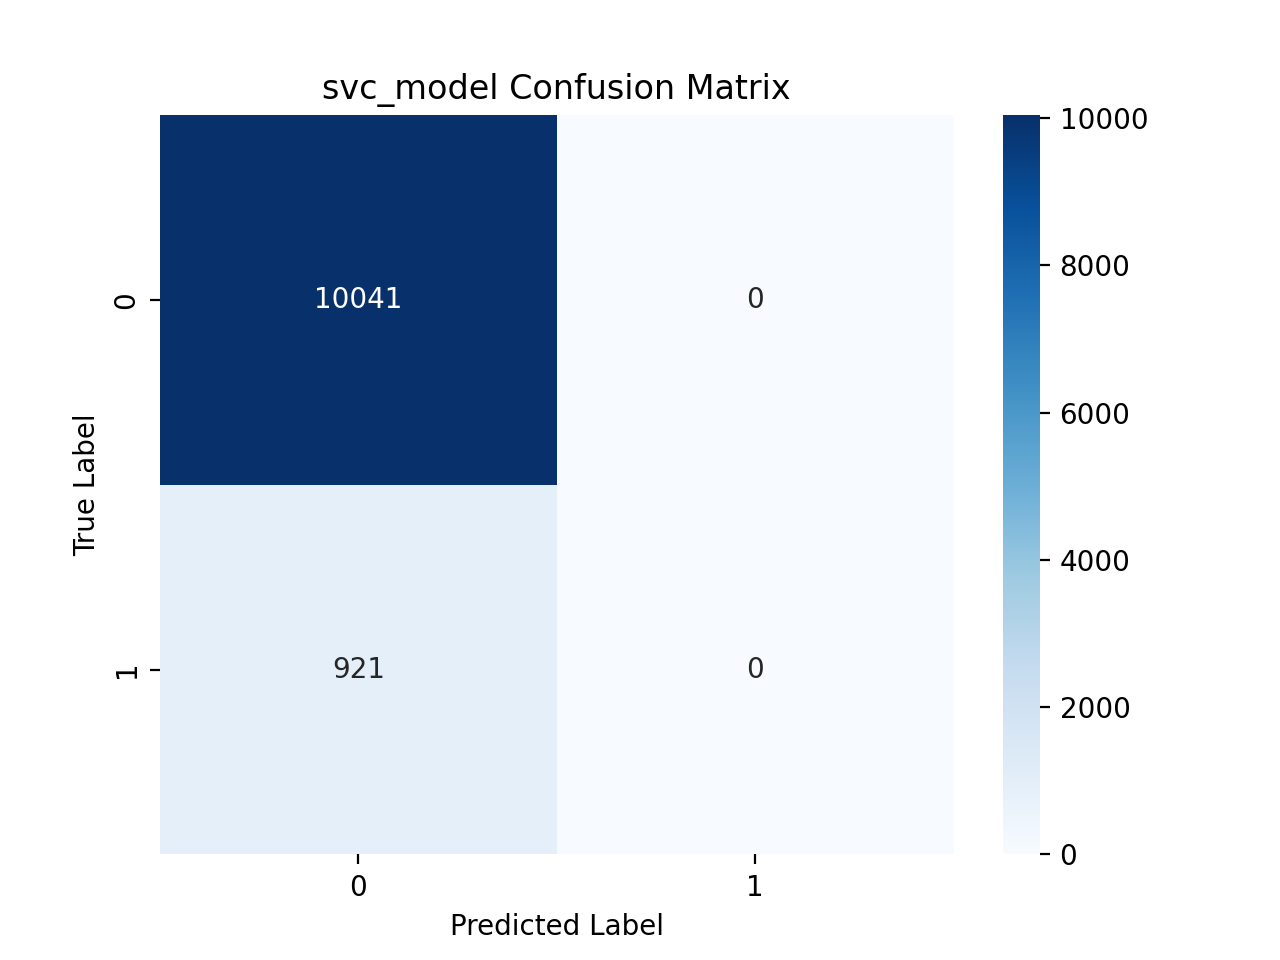

svc_model Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10041
           1       0.00      0.00      0.00       921

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962

[[10041     0]
 [  921     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10041
           1       0.00      0.00      0.00       921

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



C:\Users\ostab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\ostab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\ostab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\ostab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricW

In [73]:
# loop through the models and make predictions on the test data
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))
    y_pred = model.predict(X_test)
    
  # plot the confusion matrix as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    ax.set_title(name + " Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    plt.show()
    
    # print the classification report for each model
    report = classification_report(y_test, y_pred)
    print(name + " Classification Report:")
    print(report)   
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [75]:
selector = SelectKBest(k=10, score_func=f_classif)

In [76]:
selector.fit(X_train, y_train)

SelectKBest()

In [77]:
selector.get_support(indices=True)

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [79]:
df.columns[selector.get_support(indices=True)]

Index(['Department', 'No_of_Region', 'Level_of_education',
       'Recruitment_channel', 'No_of_other_trainings_completed', 'Age',
       'Performance_Score', 'Length_of_service', 'High_KPIS', 'Awards_won'],
      dtype='object')

In [86]:
Select_columns = pd.DataFrame({'Important_Feature':df.columns[selector.get_support(indices=True)],
                  'Score':selector.get_support(indices=True)} )
Select_columns

Important_Feature  Score
0                       Department      1
1                     No_of_Region      2
2               Level_of_education      3
3              Recruitment_channel      5
4  No_of_other_trainings_completed      6
5                              Age      7
6                Performance_Score      8
7                Length_of_service      9
8                        High_KPIS     10
9                       Awards_won     11

Text(0.5, 1.0, 'Influence of the feautures in the prediction model')

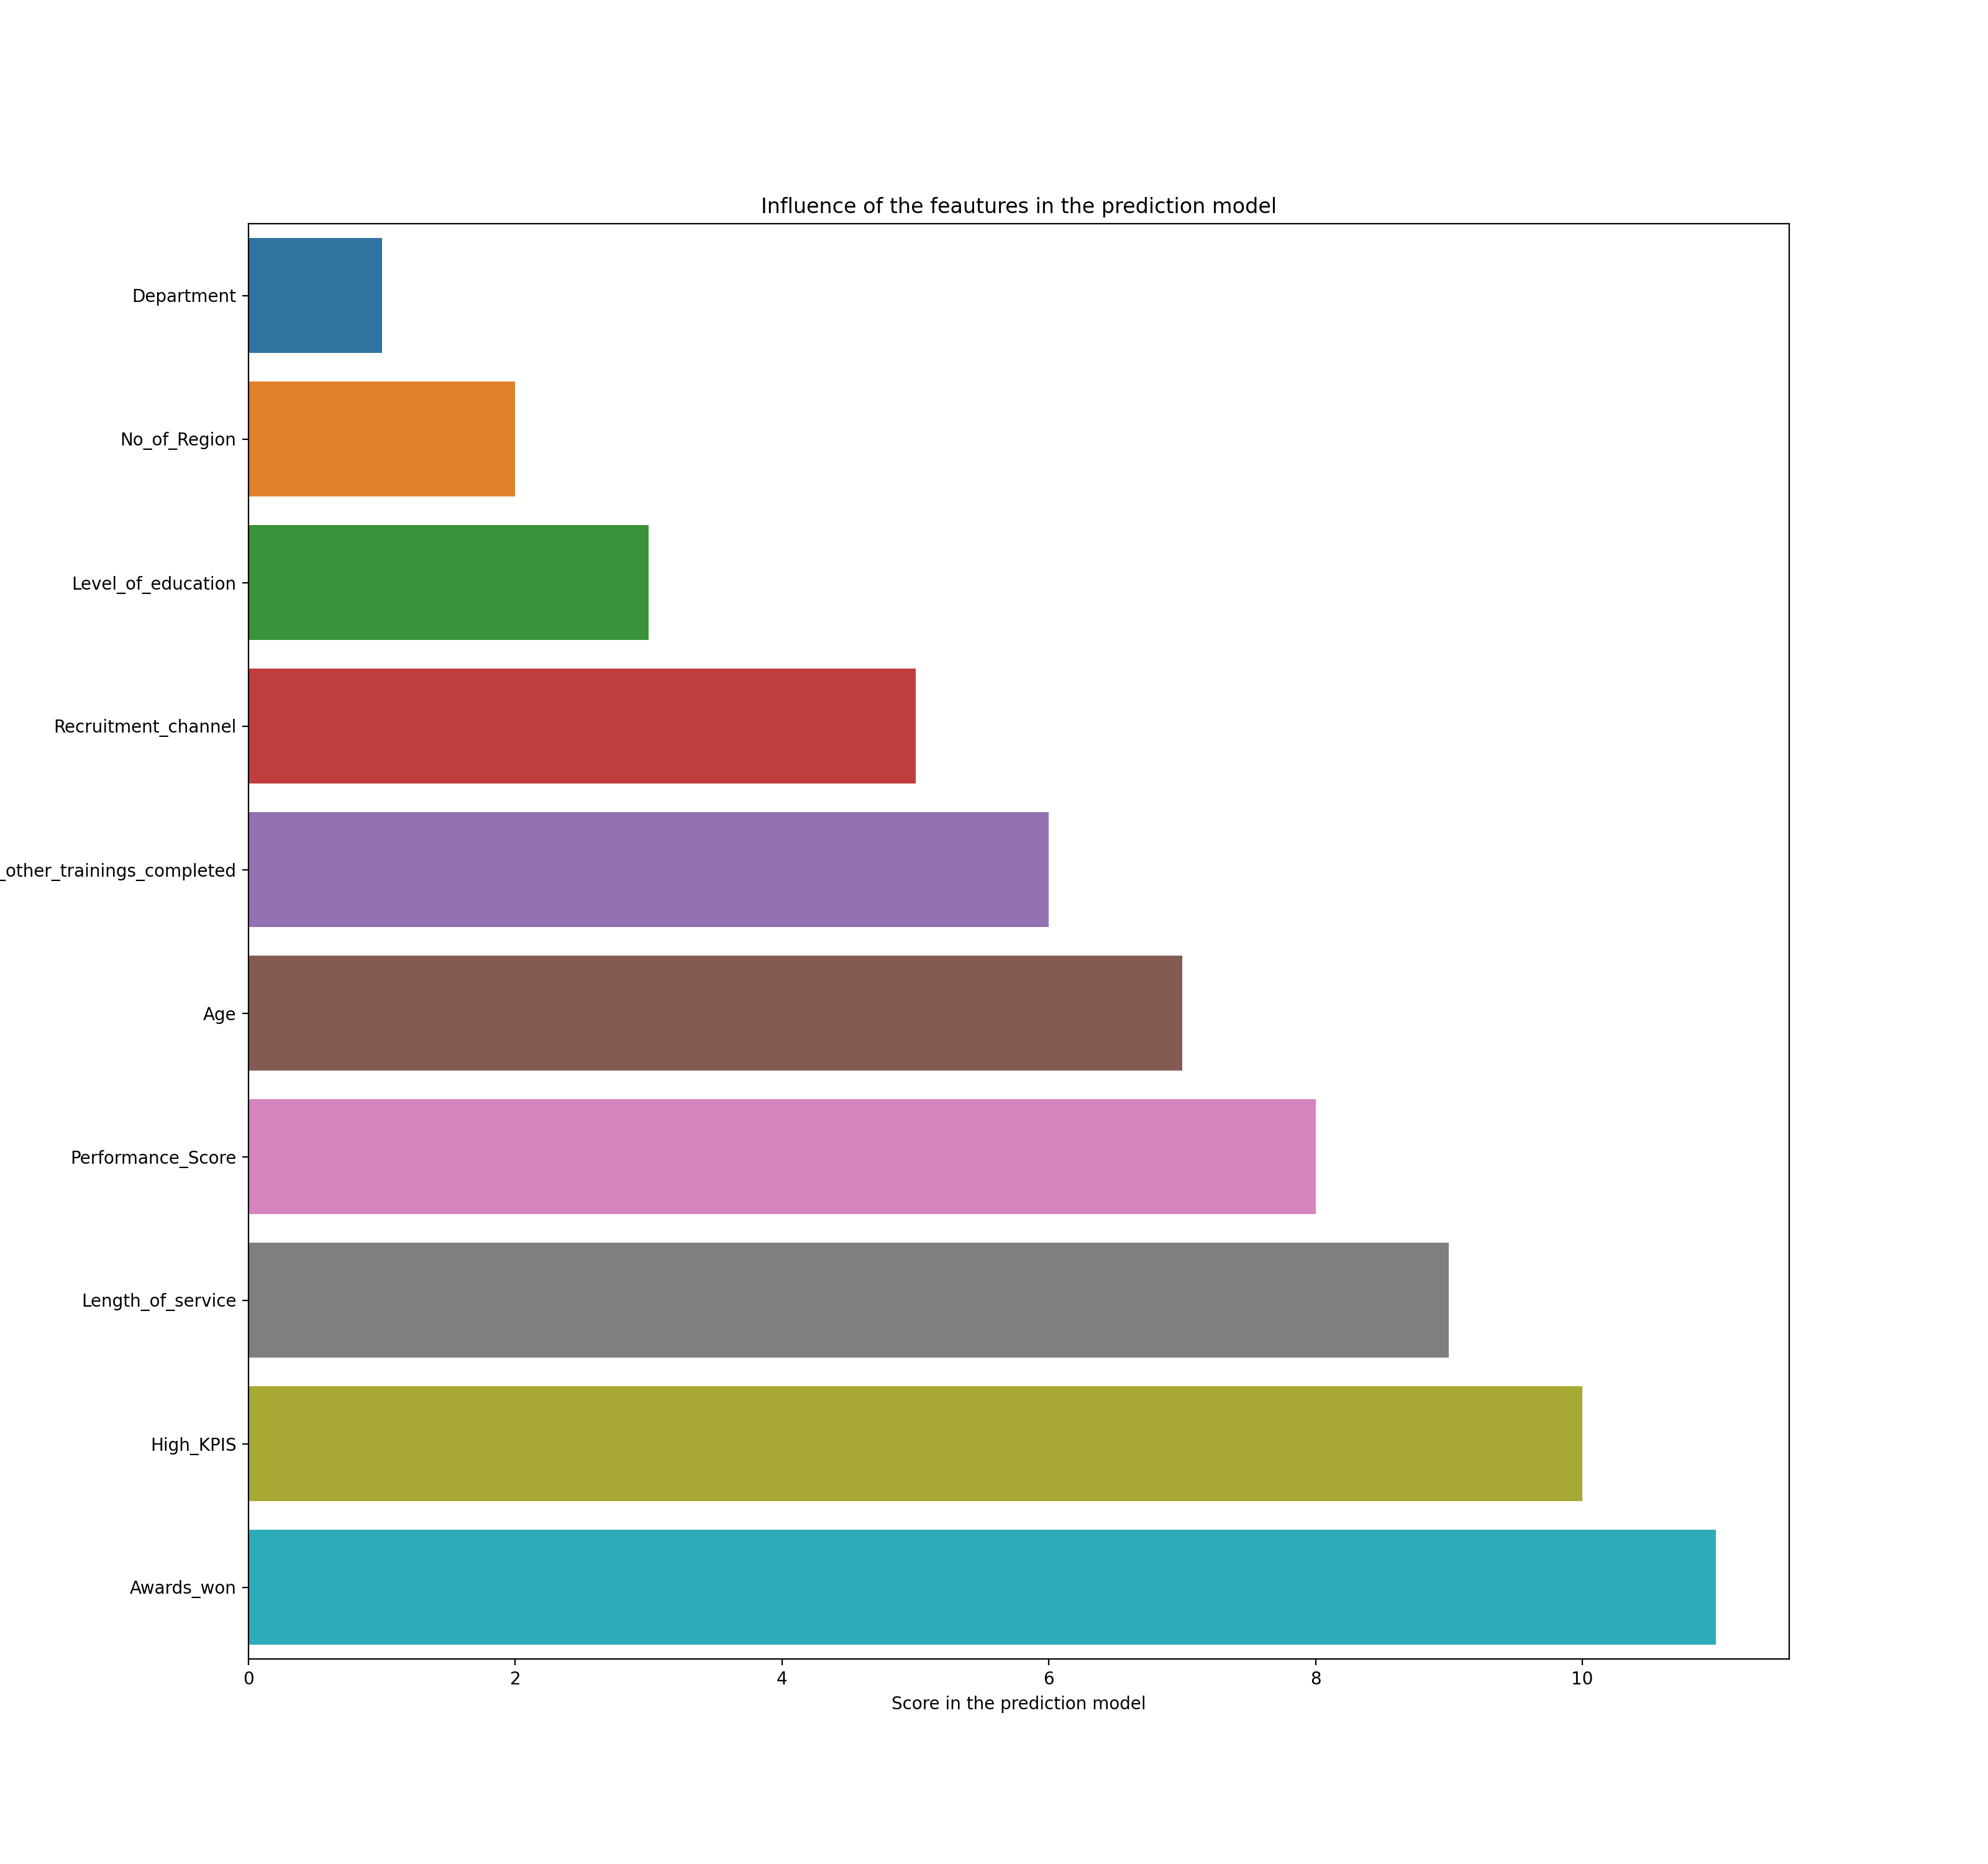

In [101]:
plt.figure(figsize=(16,15))
sns.barplot(x='Score', y='Important_Feature', data=Select_columns)
plt.xlabel('Score in the prediction model');
plt.ylabel('Features');
plt.ylabel('Features');
plt.title("Influence of the feautures in the prediction model")

In [91]:
#export and save my prediction model
import pickle
from array import array

pickle.dump(rfc_model, open('modelpredictionppe.pkl', 'wb'))

In [103]:
df.to_excel('dfhr.xlsx')